# Methods for Data Science: Course Work 1

### Before reading:
In this coursework, 2 tasks were addressed, first of which is regression and the second of which is classification.

Under the deadline of each subsection, I wrote what I did and what was considered generally. And in the end of each subsection, or under plots, I also wrote the report of any findings and the explanation for them.

In this coursework, a considerable proportion of the code is extracted from given notebooks of this module, including functions, docstrings and variable naming. There are slight changes subject to the task requirments as well as personal coding styles. All the functions extracting from the coding notebooks will be specified ahead of the function.

Off we go!

In [422]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from matplotlib.colors import ListedColormap

### Standardization of the training and the test data

Sometimes it's necessary to standardize the training data. When a certain feature takes values at a large range, it will domonate the model-- a small change in the value of the feature will cause a great change in the outcome. The is should be avoided considering the robustness of the model.

One can always standardize by rescaling the original data set by first substracting the mean of the data set from itself and dividing itself by its standard deviation (std), which scales the training data so that it has mean 0 and std 1.

It's also important to standardize the test data, using the same scaling method as operated on the training set, but with the mean and std of the TRAINING DATA SET! Two reasons are listed for this:

1. Robustness of the model: if the test data has a much larger range than the training data for some feature, the trained model will be sensitive to large values in the test data, as they are seen as 'outliers' to the model. Using the mean and std of the training data transforms the test data to the similar scale of the training data and results into way less outliers.

2. Consistency to compare: using only one mean and one std transforms the training and test data in the same way, making it easier to compare model performance of two data sets.

## Task 1:  Regression (50 marks)



### Preliminaries: Data Preparation

From the first 10 samples, we see that `Frequency` takes large values, such as 2175.611424, while `Chord Length` and `Thickness` take values mostly smaller than 1, like 0.088194 for `Chord Length` and  0.044771 for `Thickness`. These features will result into unstability of the model-- a small variance in the value of "Frequeny" will lead to a relatively large change in the outcome of the regression model while a relative large change in "Chord Length" or "Thickness" will give the outcome a relative small change in the value. Therefore standardization is required. 

In the final step of data preparation, note that the intercept in not included in the original data file. Thus, a column of 1 needs to be horizontally stacked at the end, to the `X_train` and `X_test`, and a corresponding `beta_0` emerges at the first entry of the `beta_ml`, which contains the weight for each feature.This model now is shown as below:

$$\boldsymbol{X}_{\text {aug }}=\left[\begin{array}{l} \boldsymbol{X} \\ \boldsymbol{1} \end{array}\right]$$

$$
y=\boldsymbol{X}_{\mathrm{aug}}^T \boldsymbol{\beta}_{\mathrm{aug}}+\epsilon, \quad \boldsymbol{\beta}_{\mathrm{aug}}=\left[\begin{array}{l}
\boldsymbol{\beta} \\
\beta_0
\end{array}\right]
$$

In [423]:
# import the csv file
train_data = pd.read_csv('airfoil_noise_samples.csv')
test_data = pd.read_csv('airfoil_noise_test.csv')

# partial info about the dataset
print("The shape of the original training and test data:", train_data.shape, test_data.shape)    
display(train_data.head(10))
display(test_data.head(10))

The shape of the original training and test data: (3890, 7) (973, 7)


Frequency      Angle  Displacement  Chord length   Velocity  Thickness  \
0  2175.611424  15.138865     21.075119      0.088194  66.764401   0.044771   
1  2962.923620  13.400893     13.200889      0.048462  78.221903   0.011041   
2  4430.810843   2.164599     13.959536      0.226743  57.053201   0.011499   
3  4939.695645  13.857682     18.203793      0.021705  23.896377   0.021475   
4  2193.979785   9.298757     11.007713      0.052737  38.917034   0.001741   
5  1555.843040   8.048993      9.227235      0.088870  32.835170   0.006553   
6   850.307974   2.588876     15.608633      0.290574  26.223894   0.003139   
7  2892.383673   0.052070      3.345630      0.016743  69.994584   0.002674   
8  4791.451768  12.136246     17.311292      0.067119  36.479706   0.028416   
9  1796.144952  14.958928     20.145914      0.119946  67.887560   0.046078   

   Sound Pressure  
0      122.365215  
1      129.296236  
2      121.827380  
3      114.998132  
4      125.639641  
5      129.918050  
6      122.351477  
7      134.570591  
8      117.735889  
9      124.442022

Frequency      Angle  Displacement  Chord length   Velocity  Thickness  \
0  1143.654418  12.783087     15.277127      0.110389  46.089548   0.024076   
1   619.208992   4.460285     16.198696      0.284357  36.728360   0.004000   
2   646.114737   2.521952      7.533605      0.072292  59.498237   0.003590   
3  1246.777461   8.438129     12.396435      0.034411  47.557277   0.002407   
4   286.200927  12.238350     20.877161      0.082437  72.786590   0.036883   
5   497.618583   7.435535     15.242898      0.132067  62.347478   0.001657   
6  5275.370821   3.033078      9.747409      0.134838  57.112204   0.005682   
7  2729.967513  11.529228     19.058322      0.141772  34.877830   0.058157   
8  2163.049145   9.371793      7.413034      0.047968  58.659275   0.008009   
9  1306.344254   9.954367     14.845855      0.116116  67.140211   0.028452   

   Sound Pressure  
0      125.332111  
1      122.801183  
2      129.361188  
3      125.656263  
4      124.241736  
5      126.903749  
6      122.096099  
7      119.055734  
8      128.155787  
9      125.751489

In [424]:
# define a function to standardize the data
def standardize(data):
    """Return a standardized dataset."""
    mean = np.mean(data, 0)
    std = np.std(data, 0)
    return (data - mean)/std

In [425]:
# standardize the training data set
st_train_data = standardize(train_data)

# standardize the test data set
st_test_data = (test_data - np.mean(train_data, 0)) / np.std(train_data, 0)

display(st_train_data.head(10))
print("The shape for the standardized training and test data is:", st_train_data.shape, st_test_data.shape)

Frequency     Angle  Displacement  Chord length  Velocity  Thickness  \
0  -0.275360  1.240774      1.603025     -0.559031  0.934311   2.181867   
1   0.007621  0.928600     -0.074905     -0.989537  1.631399  -0.232245   
2   0.535219 -1.089661      0.086756      0.942165  0.343469  -0.199456   
3   0.718126  1.010648      0.991171     -1.279454 -1.673834   0.514553   
4  -0.268758  0.191775     -0.542251     -0.943219 -0.759959  -0.897886   
5  -0.498121 -0.032707     -0.921656     -0.551713 -1.129987  -0.553437   
6  -0.751709 -1.013452      0.438165      1.633790 -1.532225  -0.797801   
7  -0.017733 -1.469113     -2.174975     -1.333212  1.130839  -0.831083   
8   0.664843  0.701444      0.800987     -0.787388 -0.908249   1.011313   
9  -0.411750  1.208454      1.405020     -0.214998  1.002645   2.275460   

   Sound Pressure  
0       -0.336153  
1        1.115428  
2       -0.448793  
3       -1.879060  
4        0.349618  
5        1.245656  
6       -0.339031  
7        2.220049  
8       -1.305685  
9        0.098797

The shape for the standardized training and test data is: (3890, 7) (973, 7)


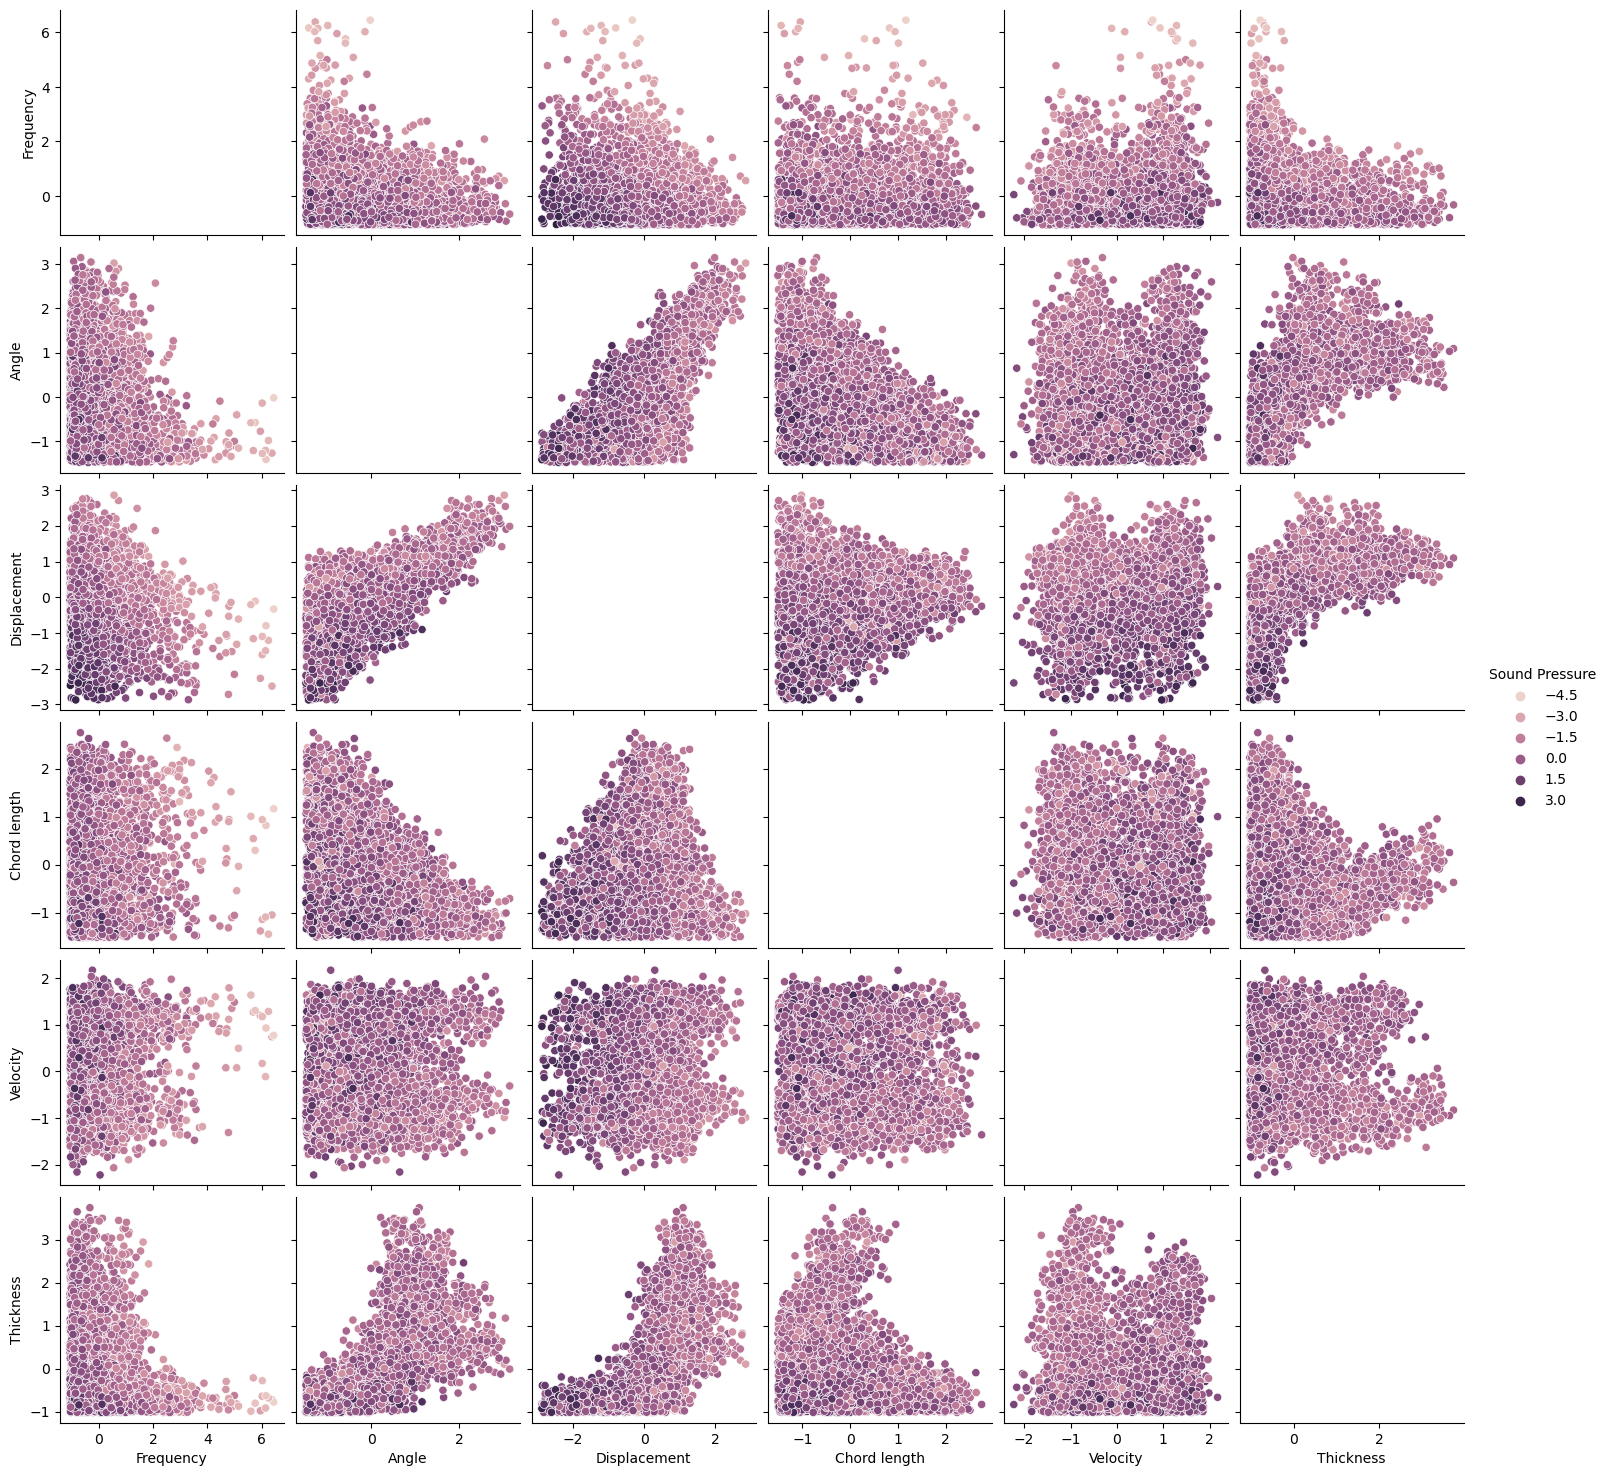

In [426]:
# relations between pairs of features
sns.pairplot(st_train_data ,hue='Sound Pressure')
plt.show()

In [427]:
# split the traning and test data
X_train = st_train_data.iloc[:, :-1]
y_train = st_train_data.iloc[:, -1]
X_test = st_test_data.iloc[:, :-1]
y_test = st_test_data.iloc[:, -1]

# convert the data to numpy arrays for computation conveniences
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [428]:
# augment X_train and X_test with a col of intercept
N, D = X_train.shape
X_train_aug = np.hstack([np.ones((N,1)), X_train])
N_train_aug, D_train_aug = X_train_aug.shape

X_test_aug = np.hstack([np.ones((X_test.shape[0],1)), X_test])
N_test_aug, D_test_aug = X_test_aug.shape

-------------------------------------------------------------------------------

### 1.1 Training a Linear Model

In this sectoin, the Ordinary Least Square regression model is implemented to find the beta coefficients. And then predictions of unseen data are implemented based on that. To assess the quality of the model, MSE and R^2 score are used.


Consider:
$$
L(\beta)_{orig}=\frac{1}{2N}\left\|\mathbf{y}-\beta \mathbf{X}-\beta_0\right\|^2
$$
which is exactly half the loss function of the Ordinary Least Square regression model:
$$
L(\beta)=\frac{1}{N}\left\|\mathbf{y}-\beta \mathbf{X}-\beta_0\right\|^2
$$

For such a model to be 'good', it's expected that predicted values are close to true values. Thus, for this loss function given, the smaller the 2_norm of the difference between the predicted y value ($\beta X$) and the true value ($y$), the better the model has been trained. Therefore, the aim here is to minimize the loss function $L(\beta)$.

It's been proved in the lecture notes that the minimizer of $L(\beta)_{orig}$ is the maximizer of the log likelihood:
$$
L_{tot} = \sum_{i=1}^{N} log(Lik(y^{(i)}|\boldsymbol{\beta}))
$$

, and that the minimizer of $L(\beta)$ is invariant under scaling (under a positive scalar), ie. :

$$
min_{\beta} L_{orig}(\beta) = min_{\beta} L_(\beta) = max_{\beta} L_{tot}
$$

Therefore, we have the explicit solution, as derived in the lecture notes:
$$
\boldsymbol{\beta}^{\star}=\left(\mathbf{X}^T \mathbf{X}\right)^{-1} \mathbf{X}^T \mathbf{y}
$$

In [142]:
# define a function to compute the beta_ml
def max_like_estimate(X, y):
    """
    Return the estimated beta coefficients for training data.
    Args:
        X: (np.ndarray), training data.
        y: (np.ndarray), outcomes for training data.
    """
    beta_ml = np.linalg.solve(X.T @ X, X.T @ y)
    return beta_ml

#### 1.1.1 The inferred parameters for the model

In [143]:
beta_ml = max_like_estimate(X_train_aug, y_train)
print(beta_ml)

[-3.86583512e-14 -7.48825212e-01  1.74766803e-01 -8.22786353e-01
 -1.64057258e-02  3.61261966e-01 -2.84061615e-03]


In [144]:
# define a function to calculate MSE and R^2 score of the model
def mse(y, y_pred):
    """Return the MSE of the training data."""
    return np.mean((y - y_pred)**2)

def r2_score(y, y_pred):
    """Return the R^2 score for the training data."""
    return 1 - np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2)

#### 1.1.1 MSE and R^2 for the training data

In [145]:
# for the training data, report its MSE and R^2 score
y_train_pred = X_train_aug @ beta_ml

in_sample_train_mse = mse(y_train, y_train_pred)
in_sample_R_2 = r2_score(y_train, y_train_pred)

print("The MSE for the in-sample training data is: ", in_sample_train_mse)
print("The R^2 score for in-sample the training data is: ", in_sample_R_2)

The MSE for the in-sample training data is:  0.08226560227369221
The R^2 score for in-sample the training data is:  0.9177343977263077


#### 1.1.2 MSE and R^2 for the test data

In [146]:
# MSE and R^2 for the test data
y_test_pred = X_test_aug @ beta_ml

out_sample_test_mse = mse(y_test, y_test_pred)
out_sample_R_2 = r2_score(y_test, y_test_pred)

print("The MSE for the out-sample test data is: ", out_sample_test_mse)
print("The R^2 score for the out-sample test data is: ", out_sample_R_2)

The MSE for the out-sample test data is:  0.08703922891854728
The R^2 score for the out-sample test data is:  0.9083172459581623


### 1.1 Model Explanation
The inferred model parameters `beta_ml` are reported in three chunks above, which are `beta_0` to `beta_6` from left to right.
Such small figures are expected as the training data has been standardized to center around the origin.

The MSE measures the average distance from predicted values to the true values, so a relatively smaller SME indicats a better model. The MSE for `X_train_aug` is 0.0823(to 3 d.p.) and the MSE for the `X_test_aug` is 0.0870, which is slightly bigger. This is acceptable as the model is trained on the training data and correspondingly has a better fit for that.

The formula for R^2 is:
$$
R^2 = 1 - \frac{\sum_{i=1}^{N} (y_{i} - \hat{y})^2}{\sum_{i=1}^{N} (y_{i} - \bar{y})^2}
$$

This function measures how much variation of a dependent variable is explained by the independent variable(s) in a regression model. Having standardized both the `X_train` and `X_test`, the denominator is a fixed value given `y_true`s. And the numerator is the squared error. Therefore, for a 'fitted' model, we shall see a value of R^2 close to 1.

The R^2 for `X_train_aug` is 0.918 (to 3 d.p.), which shows the model is well trained. The measure takes 0.908 for `X_test_aug`. Two things to note here:

1. R^2 for training data is smaller than that of the test data. According to the R^2 formula, the change direction of MSE is opposite to that of R^2. Therefore the numerical relation is acceptable.

2. The model is well-trained with little possibility to overfit or underfit. If the trained model overfit, the MSE for `X_test_aug` should be greater. Also, both the R^2 scores for `X_train_aug` and `X_test_aug` are close to 1, it's far less likely that the model has underfit the data. Therefore, the model doesn't lose its ability of generalization.

-------------------------------------------------------------------------------

### 1.2 Lasso regression (12 marks) 

In this section, we first tuned the $\lambda$ and then discussed the effects of $\lambda$ on the model performance. Finally, we considered possibilities of when to use a regularization term.

### 1.2.1 Tune the hyperparameter

In this section, a conduct on the hyperparameter search is implemented, with the criterion of the smallest MSE, on a 5-fold cross validation.

The loss function is defined as:
$$
L_{L A S S O}(\beta)=\frac{1}{2 N}\left\|\mathbf{y}-\beta \mathbf{X}-\beta_0\right\|^2+\lambda\|\beta\|_1
$$

In [147]:
# define the cost function
def lasso_cost(X, y, beta, lamb):
    """
    Return the cost of Lasso function.
    Args:
        X: non-augmented input data
        y: output of X
        beta: estimated coefficients
        lamb: regularization term in the loss function
    """
    N = X.shape[0]
    y_pred = X @ beta
    cost = (1/(2*N)) * np.linalg.norm((y - y_pred))**2 + lamb*np.sum(np.abs(beta[1:]))
    return cost

Note that when taking the gradient wrt 1_norm of $\beta$: simply take d'f(0) as 0

In [148]:
def grad(X, y, beta, lamb):
    """
    Return the cost of Lasso function.
    Args:
        X: non-augmented input data
        y: output of X
        beta: estimated coefficients
        lamb: regularization term in the loss function
    """
    N = X.shape[0]
    grad = np.zeros(X.shape[1])
    grad[1:] = np.sign(beta[1:]) * lamb
    
    return 1/N * X.T @ (X @ beta - y) + grad

In [149]:
def sgd(X, y, lamb, max_iterations=10000, stop_criterion=0.0001, print_outcome=False):
    """
    Return estimated beta values for the LASSO regression.
    Args:
        X: X data with intercept
        y: outcome of X data
        lamb: regularization term in the loss function
        max_iterations: number of maximum iterations
        stop_criterion: a float controlling the time it takes to converge 
        print_outcome: boolean, printing the iteration process or not
    """

    # initialise zero weights
    beta = np.zeros(X.shape[1])
    nth = 0
    prev_cost = np.inf

    for iteration in range(1, int(max_iterations)):
        learning_rate = 1/iteration
        gradient = grad(X, y, beta, lamb)
        beta -= (learning_rate * gradient)
        
        if iteration==2**nth or iteration==max_iterations-1:
            cost = lasso_cost(X, y, beta, lamb)
            if print_outcome:
                    print("Iteration is: {}, Cost is: {}".format(iteration, cost))

            if abs(prev_cost - cost) < stop_criterion * prev_cost:
                return beta
            
            prev_cost = cost
            nth += 1

    return beta        

In [152]:
def cross_val_split(N, num_folds):
    """Return a list of arrays containing the indices of the length of the data."""
    fold_size = N // num_folds
    index_perm = np.random.permutation(np.arange(N))
    fold_index = []
    for k in range(num_folds-1):
        fold_index.append(index_perm[k*fold_size: (k+1)*fold_size])

    # there are cases when N is not divided by num_folds--simply put all the remaining samples in the last fold
    fold_index.append(index_perm[(num_folds-1)*fold_size:]) 
    return fold_index

In [435]:
def folds(X, y, k):
    """
    Return: (list), the folded training and test data set and corresponding y values.
    Args:
    k: (int), the number of folds to split into.
    """
    if type(X) != np.ndarray:
    # if X is a pandas data frame, convert to numpy to rid off column names
        X = X.to_numpy()
        y = y.to_numpy()

    fold_index = cross_val_split(X.shape[0], k)
    folded_X = [X[fold] for fold in fold_index]
    folded_y = [y[fold] for fold in fold_index]
    return folded_X, folded_y

# construct folded_X_train with augmented training data set
folded_X_train, folded_y_train = folds(X_train_aug, y_train, 5)

In [155]:
# perform sgd on 5 folds of the training data
def folds_5_mse(folded_X_train, folded_y_train, lamb, max_iterations=10000, stop_criterion=0.001, print_outcome=False):
    """
    Return the average mse for a 5-fold cross validation for one lambda.
    Args:
        folded_X_train: folded training set containing 5 folds.
        folded_y_train: folded test set containing 5 folds.
        lamb: regularization term in the loss function
        max_iterations: number of maximum iterations
        stop_criterion: a float controlling the time it takes to converge 
        print_outcome: boolean, printing the iteration process or not
    """

    num_folds = len(folded_X_train)

    for i in range(num_folds):
        # split the training data into 4 folds for training and 1 fold for validation
        X_train_i = np.vstack([folded_X_train[k] for k in range(num_folds) if k!=i])
        y_train_i = np.hstack([folded_y_train[k] for k in range(num_folds) if k!=i])
        X_val_i = folded_X_train[i]
        y_val_i = folded_y_train[i]
        
        # perform sgd
        beta_i = sgd(X_train_i, y_train_i, lamb, max_iterations, stop_criterion, print_outcome)
        # calculate the average mse on the validation data
        y_val_pred_i = X_val_i @ beta_i
        ave_mse = mse(y_val_i, y_val_pred_i)
        
    return ave_mse

In [156]:
# perform folds_5_mse on a range of lambdas and find the optimal lambda
def choose_optimal_lamb(folded_X_train, folded_y_train, lambs, max_iterations=10000, stop_criterion=0.001, print_outcome=False):
    """Return the optimal lambda and the corresponding average mse.
    Args:
        folded_X_train: folded training set containing 5 folds.
        folded_y_train: folded test set containing 5 folds.
        lamb: regularization term in the loss function
        max_iterations: number of maximum iterations
        stop_criterion: a float controlling the time it takes to converge 
        print_outcome: boolean, printing the iteration process or not
    """
    # initialization
    ave_mses = np.zeros(len(lambs))

    for i, lamb in enumerate(lambs):
        ave_mses[i] = folds_5_mse(folded_X_train, folded_y_train, lamb, max_iterations, stop_criterion, print_outcome)
        
        # optionally print the iteration process on certain times
        if (i%5==0 or lamb==lambs[-1]) or print_outcome:
            print(f"lambda: {lamb}, average mse: {ave_mses[i]}")

    s_mse = np.min(ave_mses)
    
    optimal_lamb = lambs[np.argmin(ave_mses)]
    print(f"The optimal lambda {optimal_lamb}, the average mse: {s_mse}")

    return s_mse, ave_mses, optimal_lamb

#### $\lambda$ scanning

The optimal lambda has the smallest MSE. So the main idea to find the optimal lambda is to sqeeze the interval where the smallest MSE lies. We try by squeezing the range from the left and from the right. Squeeze from the left as long as the smallest MSE decreases until it stops decreasing. Then squeeze from the right until the smallest MSE stops decreasing.

We first choose a range np.logspace(-10, 0) to see how MSE changes according to $\lambda$.

We set `max_iterations` 20000, `stop_criterion` = 0.001 to get the MSE as explicit as possible.

lambda: 1e-10, average mse: 0.08100913278468765
lambda: 1.0481131341546874e-09, average mse: 0.08100913275026003
lambda: 1.0985411419875573e-08, average mse: 0.0810091323894187
lambda: 1.1513953993264481e-07, average mse: 0.08100912860746574
lambda: 1.2067926406393288e-06, average mse: 0.08100908897612684
lambda: 1.2648552168552958e-05, average mse: 0.08100867513020275
lambda: 0.0001325711365590111, average mse: 0.0810045135743137
lambda: 0.001389495494373139, average mse: 0.0809799218339989
lambda: 0.014563484775012445, average mse: 0.0824820733724135
lambda: 0.15264179671752365, average mse: 0.19282095743569916
lambda: 1.0, average mse: 0.9963890954491214
The optimal lambda 0.001389495494373139, the average mse: 0.0809799218339989
MSE for the whole X_train and X_test are:  0.08226560227369221 0.08703922891854728


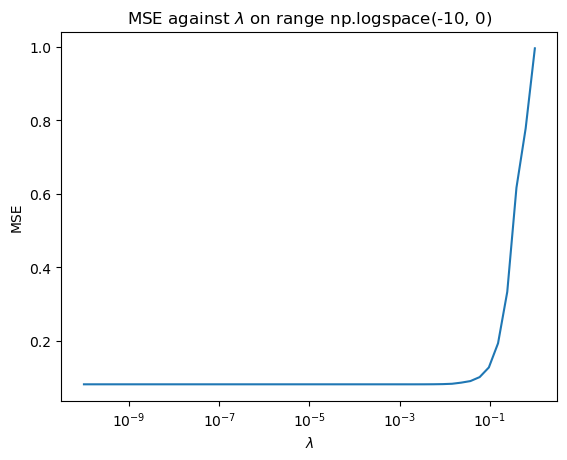

In [162]:
lamb_range = np.logspace(-10, 0)

s_mse, ave_mses, optimal_lamb = choose_optimal_lamb(folded_X_train, folded_y_train, lambs=lamb_range, max_iterations=20000, stop_criterion=0.001, print_outcome=False)
print("MSE for the whole X_train and X_test are: ", in_sample_train_mse, out_sample_test_mse)

# print the MSE against each lambda in the chosen range
plt.semilogx(lamb_range, ave_mses)
plt.xlabel("$\lambda$")
plt.ylabel("MSE")
plt.title("MSE against $\lambda$ on range np.logspace(-10, 0)")
plt.show()

In [163]:
print(f'optimal lambda within log(-10, 0) is: {optimal_lamb}')
print(f'smallest MSE is {s_mse}')

optimal lambda within log(-10, 0) is: 0.001389495494373139
smallest MSE is 0.0809799218339989


From the first range chosen, we see that MSE increases slowly and then to about $10^{-1}$ it increases drastically. So we squeeze  from the right to cut the part after $10^{-1}$ and from the left to $10^{-4}$ to see the change.

lambda: 0.0001, average mse: 0.08100561264232535
lambda: 0.00020235896477251576, average mse: 0.08100223856669997
lambda: 0.00040949150623804275, average mse: 0.0809961247083517
lambda: 0.0008286427728546842, average mse: 0.080986636343574
lambda: 0.0016768329368110084, average mse: 0.08097906605669836
lambda: 0.00339322177189533, average mse: 0.08101592435491729
lambda: 0.006866488450042998, average mse: 0.08127356770280449
lambda: 0.013894954943731374, average mse: 0.08234789344444954
lambda: 0.028117686979742307, average mse: 0.08637839895540882
lambda: 0.05689866029018293, average mse: 0.09797727429475357
lambda: 0.1, average mse: 0.13034296183580793
The optimal lambda 0.0016768329368110084, the average mse: 0.08097906605669836
MSE for whole X_train and X_test are:  0.08226560227369221 0.08703922891854728


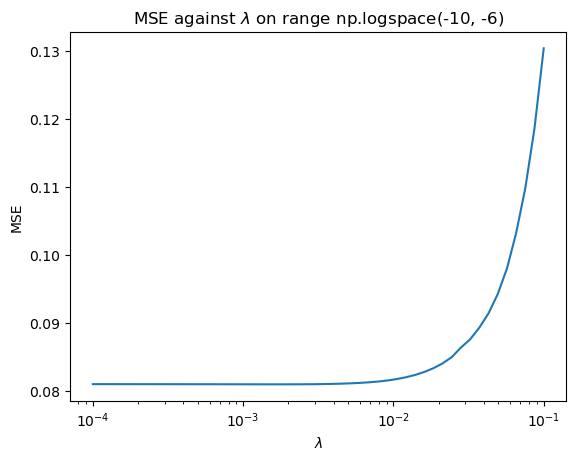

In [164]:
lamb_range_2 = np.logspace(-4, -1)

s_mse, ave_mses_2, optimal_lamb = choose_optimal_lamb(folded_X_train, folded_y_train, lambs=lamb_range_2, max_iterations=20000, stop_criterion=0.0001, print_outcome=False)
print("MSE for whole X_train and X_test are: ", in_sample_train_mse, out_sample_test_mse)

plt.semilogx(lamb_range_2, ave_mses_2)
plt.xlabel("$\lambda$")
plt.ylabel("MSE")
plt.title(r"MSE against $\lambda$ on range np.logspace(-4, -1)")  # note the typo in the title of the plot below
plt.show()

In [165]:
print(f'optimal lambda within log(-4, -1) is: {optimal_lamb}')
print(f'smallest MSE is {s_mse}')

optimal lambda within log(-4, -1) is: 0.0016768329368110084
smallest MSE is 0.08097906605669836


From the report above, we see the smallest MSE is still decreasing, so we squeeze the range from the left to $10^{-3}$ and the right to $10^{-2}$ to cut the part which is drastically increasing.

lambda: 0.001, average mse: 0.08098386659178589
lambda: 0.0012648552168552957, average mse: 0.08098081770194707
lambda: 0.0015998587196060573, average mse: 0.08097916515781126
lambda: 0.0020235896477251575, average mse: 0.0809804507422134
lambda: 0.002559547922699536, average mse: 0.08098756174615954
lambda: 0.0032374575428176433, average mse: 0.08100874536366849
lambda: 0.004094915062380423, average mse: 0.08105229163802345
lambda: 0.005179474679231213, average mse: 0.08112413160100486
lambda: 0.006551285568595509, average mse: 0.08124217631736445
lambda: 0.008286427728546842, average mse: 0.08143462330318882
lambda: 0.01, average mse: 0.08167056013760096
The optimal lambda 0.0016768329368110084, the average mse: 0.08097906605669836
MSE for whole X_train and X_test are:  0.08226560227369221 0.08703922891854728


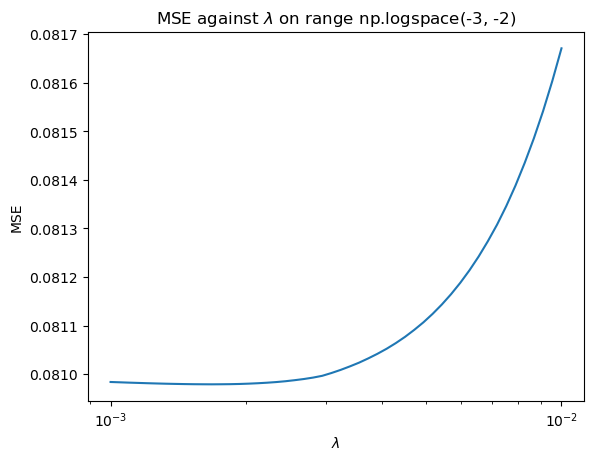

optimal lambda within log(-3, -2) is: 0.0016768329368110084
smallest MSE is 0.08097906605669836


In [166]:
lamb_range_3 = np.logspace(-3, -2)

s_mse, ave_mses_3, optimal_lamb = choose_optimal_lamb(folded_X_train, folded_y_train, lambs=lamb_range_3, max_iterations=20000, stop_criterion=0.0001, print_outcome=False)
print("MSE for whole X_train and X_test are: ", in_sample_train_mse, out_sample_test_mse)

plt.semilogx(lamb_range_3, ave_mses_3)
plt.xlabel("$\lambda$")
plt.ylabel("MSE")
plt.title(r"MSE against $\lambda$ on range np.logspace(-3, -2)")
plt.show()

print(f'optimal lambda within log(-3, -2) is: {optimal_lamb}')
print(f'smallest MSE is {s_mse}')

### Final report
We suprisingly see that the smallest MSE reamins the same in this chosen range and so does the corresponding `optimal lambda`.

So we stop here and report:

##### The optimal lambda is 0.0016768329368110084, and the smallest MSE is 0.08097906605669836.

In the last graph 'MSE against $\lambda$ on range np.logspace(-3, -2)' we see a very little curvature in between. We further squeeze the range (keep the minimum) to enlarge it. And a convex 'smiling curve' is expected to see.

lambda: 0.001, average mse: 0.08098386659178589
lambda: 0.0011513953993264468, average mse: 0.08098195052528555
lambda: 0.0013257113655901094, average mse: 0.08098032409177147
lambda: 0.0015264179671752333, average mse: 0.08097930528425736
lambda: 0.0017575106248547913, average mse: 0.08097919283887739
lambda: 0.0020235896477251575, average mse: 0.0809804507422134
lambda: 0.002329951810515372, average mse: 0.08098371731482265
lambda: 0.002682695795279727, average mse: 0.08098997159172117
lambda: 0.0030888435964774815, average mse: 0.08100232246499602
lambda: 0.0035564803062231283, average mse: 0.0810236250888723
lambda: 0.003981071705534973, average mse: 0.08104596906865061
The optimal lambda 0.0016611473712508432, the average mse: 0.080979077912448


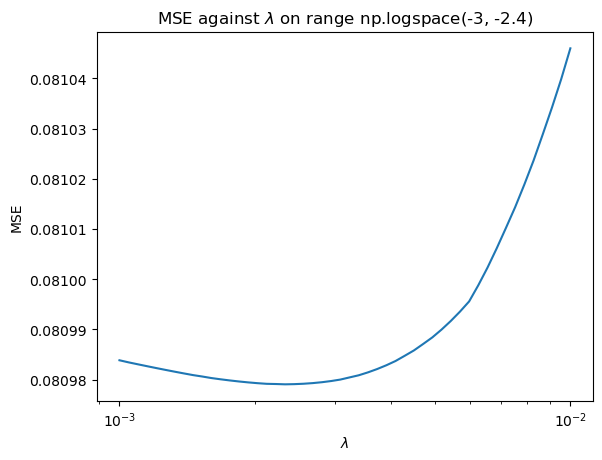

In [169]:
lamb_range_4 = np.logspace(-3, -2.4)

s_mse, ave_mses_3, optimal_lamb = choose_optimal_lamb(folded_X_train, folded_y_train, lambs=lamb_range_4, max_iterations=20000, stop_criterion=0.0001, print_outcome=False)

plt.semilogx(lamb_range_3, ave_mses_3)
plt.xlabel("$\lambda$")
plt.ylabel("MSE")
plt.title(r"MSE against $\lambda$ on range np.logspace(-3, -2.4)")
plt.show()

--------------------------------------------------------------------------------------------------------------------------------

### 1.2.2 The bias-variance trade-off and the effects of $\lambda$ on the coefficients

In this section, the reason behind the trend of the MSE is revealed--the bias-variance trade-off. The magnitude of $\lambda$ is directly associated with the bias-variance relation, via the magnitude of estimated coefficients.

In [170]:
folded_X_train, folded_y_train = folds(X_train_aug, y_train, 5)

def choose_split(i, folded_X_train, folded_y_train):
    """Return the training and test data for the (i+1)th split."""
    X_train_i = np.vstack([folded_X_train[k] for k in range(5) if k!=i])
    y_train_i = np.hstack([folded_y_train[k] for k in range(5) if k!=i])
    X_val_i = folded_X_train[i]
    y_val_i = folded_y_train[i]
    return X_train_i, y_train_i, X_val_i, y_val_i

# choose the 3rd split
X_train_fold, y_train_fold, X_val, y_val = choose_split(2, folded_X_train, folded_y_train)

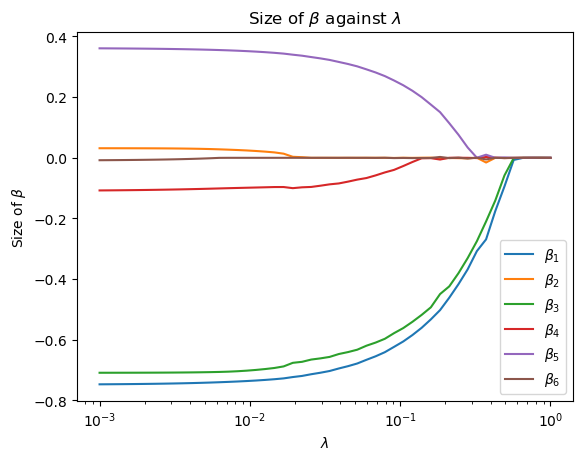

In [175]:
# consider the relation between beta and the lambda
# perform sgd on the chosen split (the third split) with a range of lambdas
def beta_lamb(X, y, lambdas, max_iterations=20000, stop_criterion=0.001, print_outcome=False):
    """
    Return the beta values for each lambda.
    lambdas: a list of lambdas.
    """
    betas = []

    for lam in lambdas:
        beta = sgd(X, y, lamb=lam, max_iterations=10000, stop_criterion=0.001, print_outcome=False)
        betas.append(beta[1:])
    
    return betas

lambdas = np.logspace(-3,0)
betas = beta_lamb(X_train_fold, y_train_fold, lambdas, max_iterations=20000, stop_criterion=0.001, print_outcome=False)

# plot the size of beta against lambda
for i in range(len(betas[0])):
    plt.semilogx(np.logspace(-3,0), np.array(betas)[:,i], label=fr'$\beta_{i+1}$')

plt.xlabel("$\lambda$")
plt.ylabel("Size of $\beta$")
plt.title("Size of $\beta$ against $\lambda$")
plt.legend()
plt.show()

### Report:

- From the plot:

We clearly see that all betas (except the `beta_0`), starting from dispersed values, all converge to 0 at different values of $\lambda$ as $\lambda$ goes large(all zero at about $\lambda=1$), giving a sparse model.

- Explanation:

The magnitude of coefficients are represents the complexity of the model, which is controlled by the magnitude of $\lambda$ through the term $\lambda||\beta||_1$. A large $\lambda$ corresponds to a small complexity, meaning that when $\lambda$ turns large, the 1_norm of $\beta$ will be shrunk to zero, and thus the `beta_1` to `beta_6`, which can be seen in the right part of the plot above. As the betas are shrunk, the degrees of freedom of the model also decrease, so the variance of the coefficients also decreases. However, the betas are going far from the true betas, thus the bias increases and increases faster than the decease of the variance. So for $MSE=var+bia^{2}$, the variance dominates and the MSE increases as lambda goes large.

The situation is the opposite for variance and bias when $\lambda$ is small. In this situation, the degrees of the freedom of the model is large, as can be seen from the left part of the plot that `beta_1` to `beta_6` takes dispersed values. The bias becomes small but the variance dominates, so MSE is also large when $\lambda$ is small.

The goal is find an optimal point to balance the decrease of bias and the increase of variance when $\lambda$ is becoming large. This motivates the optimization goal MSE in 1.2.1.

--------------------------------------------------------------------------------------------------------------------------------

### 1.2.3 Assessment of both implementations on the whole training and test data set

In [188]:
# recall the optimal lambda found in the previous section
optimal_lamb = 0.0016768329368110084

In [184]:
# train the model on the optimal lambda
beta = sgd(X_train_aug, y_train,\
           lamb=optimal_lamb, max_iterations=20000, stop_criterion=0.001, print_outcome=False)

# evaluate on train dataset
y_train_pred = X_train_aug @ beta
opti_lamb_train_mse = mse(y_train, y_train_pred)
print("In-sample MSE: ", opti_lamb_train_mse)
print("In-sample R2 score: ",r2_score(y_train, y_train_pred))

# evaluate on test dataset
y_test_pred =  X_test_aug @ beta
opti_lamb_test_mse = mse(y_train, y_train_pred)
print("Out-sample MSE: ", opti_lamb_test_mse)
print("Out-sample R2 score: ",r2_score(y_test, y_test_pred))

print("MSE for the whole X_train and X_test:", in_sample_train_mse, out_sample_test_mse)

In-sample MSE:  0.08606574863037891
In-sample R2 score:  0.9139342513696209
Out-sample MSE:  0.08606574863037891
Out-sample R2 score:  0.9012627080884122
MSE for the whole X_train and X_test: 0.08226560227369221 0.08703922891854728


In [185]:
# train on lambda = 0
beta = sgd(X_train_aug, y_train,\
           lamb=0, max_iterations=20000, stop_criterion=0.001, print_outcome=False)

# evaluate on train dataset
y_train_pred = X_train_aug @ beta
zero_lamb_train_mse = mse(y_train, y_train_pred)
print("In-sample MSE: ", zero_lamb_train_mse)
print("In-sample R2 score: ",r2_score(y_train, y_train_pred))

# evaluate on test dataset
y_test_pred =  X_test_aug @ beta
zero_lamb_test_mse = mse(y_test, y_test_pred)
print("Out-sample MSE: ", zero_lamb_train_mse)
print("Out-sample R2 score: ",r2_score(y_test, y_test_pred))

print("MSE for the whole X_train and X_test:", in_sample_train_mse, out_sample_test_mse)

In-sample MSE:  0.08607082438860097
In-sample R2 score:  0.9139291756113989
Out-sample MSE:  0.08607082438860097
Out-sample R2 score:  0.9010447318669914
MSE for the whole X_train and X_test: 0.08226560227369221 0.08703922891854728


In [187]:
print("The MSE of the training set via LASSO is smaller than that of LSR:", opti_lamb_train_mse < zero_lamb_train_mse)
print("The difference between the MSE of the training set via LASSO and LSR:", opti_lamb_train_mse - zero_lamb_train_mse)
print("The MSE of the test set via LASSO is smaller than that of LSR:", opti_lamb_test_mse < zero_lamb_test_mse)

The MSE of the training set via LASSO is smaller than that of LSR: True
The difference between the MSE of the training set via LASSO and LSR: -5.075758222061744e-06
The MSE of the test set via LASSO is smaller than that of LSR: True


### Report:

We report that the MSE of the training set via LASSO is smaller than that of LSR. The reason could be the colinearlity between the `angle` and `displacement`, which can be seen from the `sns.pairplot` in preliminaries at the beginning of `Task 1`. In this case, the robustness of the model is slightly undermined by the colinearity and therefore LASSO which shrinks the coefficients performs alightly better than LSR.

Also, the MSE of the test set via LASSO is smaller than that of LSR. This is because when posing the regularization term, the model complexity is restricted and will not be too high. This gives the test set a 'reminder' and it is less likely to overfit the unseen data.

- Optimal $\lambda$ or $\lambda=0$?

The implementation is much easier for LSR ($\lambda=0$), but it exposes the model to potential overfit problem when the data set has many features relatively to the number of samples, and worse especially when there is colineality between features or some of them are irrelavent to the outcome. No regularization will therefore force the outcome to respond to noise and outliers, by obtaining large and dispersed coefficients, as shown in the left half of the graph obtained in section 1.2.2, and is likely to result into a large MSE once variance takes control.

On the other hand, an `optimal lambda` is always able to be found. But if the data set is small or there are a few features to train a model, posing the `optimal lambda` will cover a considerable batch of information of the data as it shinks some of the coefficients to be close to 0. It's likely to result into underfitting, then. In terms of MSE, this will give a small variance and a dominating bias if $\lambda$ is large, hence also a great MSE.

- Summary:

Generally speaking, whether posing a $\lambda$ term should be carefully considered. 

It should be clearified that neither of them will guarantee to give a perfect model. So both methods should be implemented and compared in the context of the addressed problem.

-------------------------------------------------------------------------------

### 1.3 Elastic Nets (20 marks) 

A new loss function giving consideration of relative importance of LASSO and RIDGE is introduced. Further, both as loss functions to optimize, which one to give more weight to when dealing with large data set needs to be contemplated..

### 1.3.1
Similar to 1.2.1, we construct a cost function, the gradient function, the stochastic gradient decent function to estimate coefficients. MSE and R^2 are used to assess the model.

In [272]:
def grad_elastic(X, y, beta, lamb, alpha):
    """
    Return the gradient of the cost function.
    """
    N = X.shape[0]
    grad = np.zeros(X.shape[1])
    grad[1:] = lamb * (np.sign(beta[1:]) * alpha + 2*beta[1:] * (1-alpha))
    return (1/N)*(X.T @ (X @ beta - y)) + grad

def elastic_cost(X, y, beta, lamb, alpha):
    """
    Return the elastic cost.
    """
    N = X.shape[0]
    return (1/(2*N)) * np.sum((X @ beta - y)**2) + lamb * alpha * np.sum(np.abs(beta[1:])) + lamb * (1-alpha) * np.linalg.norm(beta[1:], 2)

In [430]:
# chose alpha=.5, lambda=1e-5 to do a model training
def elasticnets(X ,y, alpha=0.5, max_iterations=20000, stop_criterion=0.001, lamb=1e-5, print_outcome=False):
    """
    Return the estimated beta coefficients.
    Args:
        X: the input data
        y: the output data
        alpha: term that controls the relative importance of LASSO nad RIDGE
        lamb: regularization term in the loss function
        max_iterations: number of maximum iterations
        stop_criterion: a float controlling the time it takes to converge 
        print_outcome: boolean, printing the iteration process or not
    """
    nth = 0
    beta = np.zeros((X.shape[1],))
    prev_cost = np.inf
    
    for i in range(1, int(max_iterations)+1):
        grad = grad_elastic(X, y, beta=beta, lamb=lamb, alpha=alpha)
        learning_rate = 1/i
        beta -= learning_rate * grad

        # we print cost when i is an integer power of 2, max_its -1 or gradient smaller than eps
        if (i%50==0 or i==max_iterations-1) and print_outcome:
            cost = elastic_cost(X, y, beta, lamb, alpha)
            print(f"For iteration {i}, cost : {cost}")
            if abs(prev_cost - cost) < stop_criterion * prev_cost:
                print(f"Beta converged after {i} iterations!")
                return beta

            prev_cost = cost
            nth += 1
    
    return beta 

In [431]:
# choose the defaulted parameters, to test whether the model converges and correct
beta = elasticnets(X_train_aug, y_train, print_outcome=True)

# evaluate on train dataset
y_train_pred = X_train_aug @ beta
print("\nIn-sample MSE: ", mse(y_train, y_train_pred))
print("In-sample R^2 score: ",  r2_score(y_train, y_train_pred))

# evaluate on test dataset
y_test_pred = X_test_aug @ beta
print("\nOut-sample MSE: ",mse(y_test, y_test_pred))
print("Out-sample R^2 score: ", r2_score(y_test, y_test_pred))

For iteration 50, cost : 0.04802197518257788
For iteration 100, cost : 0.046932020914355874
For iteration 150, cost : 0.04640454234339495
For iteration 200, cost : 0.0460691715747874
For iteration 250, cost : 0.04582828025193107
For iteration 300, cost : 0.045642710179134696
For iteration 350, cost : 0.04549309815658766
For iteration 400, cost : 0.045368552235583046
For iteration 450, cost : 0.04526238088366855
For iteration 500, cost : 0.04517019971210671
For iteration 550, cost : 0.04508899115560793
For iteration 600, cost : 0.04501659608000112
For iteration 650, cost : 0.04495142015034628
For iteration 700, cost : 0.04489225501301269
For iteration 750, cost : 0.044838164557594685
For iteration 800, cost : 0.044788409892853265
For iteration 850, cost : 0.04474239830604762
For iteration 900, cost : 0.044699647603072025
Beta converged after 900 iterations!

In-sample MSE:  0.08936916669906722
In-sample R^2 score:  0.9106308333009326

Out-sample MSE:  0.09858234404110497
Out-sample R^2 

--------------------------------------------------------------------------------------------------------------------------------

### 1.3.2

In this section, a weight hyper parameter between LASSO and RIDGE is searched for the optimal. Similarly, quality measures MSE and R^2 are used.

In [432]:
def folds_5_elastic(folded_X_train, folded_y_train, lamb, alpha):
    """
    Return the mean MSE for a cv based on one lambda and one alpha.
    Args:
        folded_X_train: 5-fold input data
        folded_y_train: 5-fold output data
        lamb: term in the elastic net loss function
        alpha: term to control the relative importance between LASSO and RIDGE
    """
    scores = []
    num_folds = len(folded_X_train)
    
    #print("alpha, lamb:", alpha, lamb)
    for i in range(num_folds):
        # split the training data into 4 folds for training and 1 fold for validation
        X_train_i = np.vstack([folded_X_train[k] for k in range(num_folds) if k!=i])
        y_train_i = np.hstack([folded_y_train[k] for k in range(num_folds) if k!=i])
        X_val_i = folded_X_train[i]
        y_val_i = folded_y_train[i]

    # Instantiating the Lasso regression model with the regularization parameter "lamb"
        beta_i = elasticnets(X_train_i, y_train_i, lamb=lamb, alpha=alpha, print_outcome=False)
        y_val_i_pred = X_val_i @ beta_i
        score_i = mse(y_val_i, y_val_i_pred)
        
        scores.append(score_i)

    return np.mean(scores)

In [433]:
# conduct grid research on lambda and alpha on respective ranges
def choose_opt_lamb(folded_X_train, folded_y_train, lamb_range, alpha_range, max_iterations, print_outcome=False):
    """
    Return the optimal lambda and corresponding MSE fro a range of lambda and alpha.
    """
    scores = np.zeros((len(lamb_range), 3))
    opt_lambs = []

    for j, alpha in enumerate(alpha_range):
        for i, lamb in enumerate(lamb_range):
            # Compute the cross-validation score for each value of lambda
            scores[i][j] = folds_5_elastic(folded_X_train, folded_y_train, lamb, alpha)
            if print_outcome:
                print(f'lamb={lamb}, alpha={alpha}: {scores[i][j]}')

        opt_lamb = np.argmin(min(scores[:, j]))
        opt_lambs.append(lamb_range[opt_lamb])

        print(f"Optimal score for alpha = {alpha} : {min(scores[:,j])} with lambda = {lamb_range[opt_lamb]}")

    return opt_lambs, scores

In [443]:
# specify lamb_range and alpha_range
lamb_range = np.logspace(-5, 0, num=5)
alpha_range = [0.1, 0.5, 0.9]
max_its = 20000

# implement grid search to search for optional lambda and alpha
opt_lambs, scores = choose_opt_lamb(folded_X_train, folded_y_train, lamb_range, alpha_range, max_iterations=max_its, print_outcome=False)
print('opt_lambs:', opt_lambs)

Optimal score for alpha = 0.1 : 0.08647676343016227 with lambda = 1e-05
Optimal score for alpha = 0.5 : 0.08647609184105663 with lambda = 1e-05
Optimal score for alpha = 0.9 : 0.08647220915170908 with lambda = 1e-05
opt_lambs: [1e-05, 1e-05, 1e-05]


In [444]:
# retrain the whole data set using the optimal lambda that has been found
beta_lis = []
mse_lis = []
r2_lis = []

# for X_train
for i in range(len(alpha_range)):
    beta_i = elasticnets(X_train_aug, y_train, alpha=alpha_range[i], lamb=opt_lambs[i])
    mse_i = mse(y_train, X_train_aug @ beta_i)
    r2_i = r2_score(y_train, X_train_aug @ beta_i)
    beta_lis.append(beta_i)
    print(f'\nfor X_train and lambda={opt_lambs[i]}, for alpha={alpha_range[i]},')
    print(f'mse and r^2 score are: {mse_i}, {r2_i}.')

# for X_test
for j in range(3):
    mse_j = mse(y_test, X_test_aug @ beta_lis[j])
    r2_j = r2_score(y_test, X_test_aug @ beta_lis[j])
    mse_lis.append(mse_j)
    r2_lis.append(r2_j)
    print(f'\nfor X_test and lambda={opt_lambs[j]}, for alpha={alpha_range[j]},')
    print(f'mse and r^2 score are: {mse_j}, {r2_j}.')

print("\nThe alpha with the smallest MSE:", alpha_range[np.argmin(mse_lis)])
print("The alpha with largest R2 score:", alpha_range[np.argmax(r2_lis)])


for X_train and lambda=1e-05, for alpha=0.1,
mse and r^2 score are: 0.08607191983202277, 0.9139280801679771.

for X_train and lambda=1e-05, for alpha=0.5,
mse and r^2 score are: 0.08607131330309574, 0.9139286866969041.

for X_train and lambda=1e-05, for alpha=0.9,
mse and r^2 score are: 0.08607070737257147, 0.9139292926274284.

for X_test and lambda=1e-05, for alpha=0.1,
mse and r^2 score are: 0.09394468632805712, 0.9010433838032603.

for X_test and lambda=1e-05, for alpha=0.5,
mse and r^2 score are: 0.09394343950933833, 0.9010446971395036.

for X_test and lambda=1e-05, for alpha=0.9,
mse and r^2 score are: 0.09394219338644694, 0.9010460097427972.

The alpha with the smallest MSE: 0.9
The alpha with largest R2 score: 0.9


### Report:
We see from above that when alpha=0.9 and lambda=1e-05, the model performs best. 

This mean that for elastic nest oss function, it mainly uses $||\beta||_1$ for regression, ie. LASSO has a better performance than RIDGE in this problem.

- Explanation:

In terms of the difference between norm_1 and norm_2:

The loss function wants to penalize large `beta` coefficients. When the absolute value of `beta` coefficients are generally large, norm_2 contributes more to the penalty than norm_1. But when the data has been standardized and the feature number is relatively large, estimated `beta` coefficients are estimated small, as section 1.1 has shown. In this case, norm_1 contributes more than norm_2. This means, we should give more weight to LASSO in order to penalize large `beta` coefficients.

In terms of the difference of the property between the RIDGE and LASSO:

LASSO is able to shink coefficients to zero, giving sparse models, while RIDGE is never able to do that as long as $\lambda \neq 0$. From this perspective, LASSO should be given more weight when dealing with a large data set with many features, because we are not able to judge which features are desirable and which are not necessary at first glance.


--------------------------------------------------------------------------------------------------------------------------------

### 1.3.3 coefficient against values of alpha
In this section, inferred parameters, norm_1 and norm_2 have been plotted wrt different values of alpha to see what the changes of weight bring to the coefficients.

In [449]:
# Visualise the inferred parameters with the optimal lambda for each value of alpha
beta_lis = []

for alpha in [0, 0.5, 1]:
    # inferred betas on choices of alpha
    beta = elasticnets(X_train_aug, y_train, alpha=alpha, lamb=1e-5, print_outcome=False)
    beta_lis.append(beta)

In [2]:
# plotting inferred parameters against alphas [0.0, 0.5, 1.0]

alpha_lis = [0.0, 0.5, 1.0]
fig, axs = plt.subplots(7, 1, figsize=(3, 35))

axs[0].plot(alpha_lis, [beta_lis[i][0] for i in range(3)], marker='o')
axs[0].set_xlabel(r"$\alpha$")
axs[0].set_ylabel(r"$\beta_0$")

axs[1].plot(alpha_lis, [beta_lis[i][1] for i in range(3)], marker='o')
axs[1].set_xlabel(r"$\alpha$")
axs[1].set_ylabel(r"$\beta_1$")

axs[2].plot(alpha_lis, [beta_lis[i][2] for i in range(3)], marker='o')
axs[2].set_xlabel(r"$\alpha$")
axs[2].set_ylabel(r"$\beta_2$")

axs[3].plot(alpha_lis, [beta_lis[i][3] for i in range(3)], marker='o')
axs[3].set_xlabel(r"$\alpha$")
axs[3].set_ylabel(r"$\beta_3$")

axs[4].plot(alpha_lis, [beta_lis[i][4] for i in range(3)])
axs[4].set_xlabel(r"$\alpha$")
axs[4].set_ylabel(r"$\beta_4$")

axs[5].plot(alpha_lis, [beta_lis[i][5] for i in range(3)])
axs[5].set_xlabel(r"$\alpha$")
axs[5].set_ylabel(r"$\beta_5$")

axs[6].plot(alpha_lis, [beta_lis[i][6] for i in range(3)])
axs[6].set_xlabel(r"$\alpha$")
axs[6].set_ylabel(r"$\beta_6$")

plt.show()

NameError: name 'plt' is not defined

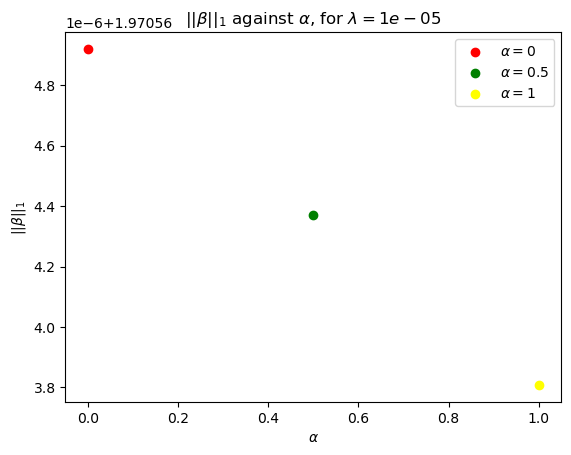

In [451]:
# norm_1 of beta
beta_norm1 = [np.sum(np.abs(beta[1:])) for beta in beta_lis]

# norm_1 for alphas
plt.scatter(0, beta_norm1[2], c='red', zorder=10, label=r'$\alpha=0$')
plt.scatter(0.5, beta_norm1[1], c='green', zorder=10, label=r'$\alpha=0.5$')
plt.scatter(1, beta_norm1[0], c='yellow', zorder=10, label=r'$\alpha=1$')

plt.xlabel(r"$\alpha$")
plt.ylabel(r"$||\beta||_1$")
plt.legend(prop={'size': 10})
plt.title(r"$||\beta||_1$ against $\alpha$, for $\lambda= 1e-05$")
plt.show()

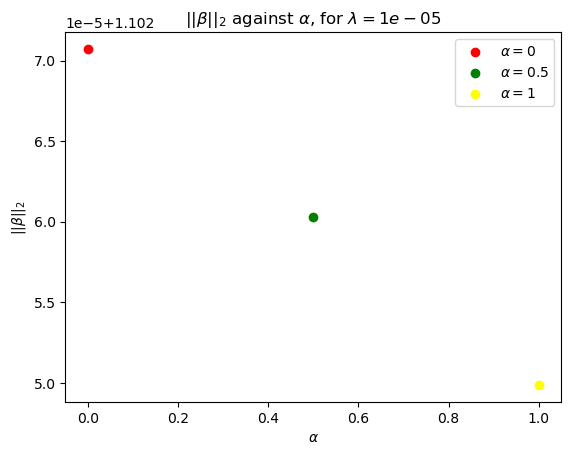

In [452]:
# plot for norm_2

# norm_2 of beta
beta_norm2 = [np.linalg.norm(beta[1:]) for beta in beta_lis]

# norm_2 for alphas
plt.scatter(0, beta_norm2[2], c='red', zorder=10, label=r'$\alpha=0$')
plt.scatter(0.5, beta_norm2[1], c='green', zorder=10, label=r'$\alpha=0.5$')
plt.scatter(1, beta_norm2[0], c='yellow', zorder=10, label=r'$\alpha=1$')

plt.xlabel(r"$\alpha$")
plt.ylabel(r"$||\beta||_2$")
plt.legend(prop={'size': 10})
plt.title(r"$||\beta||_2$ against $\alpha$, for $\lambda= 1e-05$")
plt.show()

### Report:

We see from the first figure that among inferred parameters, `beta_0`, `beta_2`, `beta_4` and `beta_6` are shunk small and `beta_1`, `beta_3` and `beta_5` are increasing. The increase in some of the inferred parameters as $\alpha$ increases is acceptible, as lambda penalizes the norm_1 and norm_2 of the parameter vector $\boldsymbol{\beta}$.

Therefore, we need to plot the norms of $\boldsymbol{\beta}$ against $\lambda$.

We see from the last two plots above that the estimated betas are indeed shrunk small.

- $\alpha=0.1$, the term to penalize is only $||\cdot||_2$. Therefore, $\beta$ is not forced to be small. A large $||\beta||_2$ is acceptable.

- $\alpha=0.5$, the weight gives half for $||\cdot||_1$ (LASSO) and half for $||\cdot||_2$ RIDGE. In this case, $||\beta||_2$ has been penalized. So the estimated value decreases.

- $\alpha=1$, the only penalty falls on $||\beta||_2$. Therefore, the magnitude  of $||\beta||_2$ has been shrunk as the `beta_1` to `beta_6` have been.

-------------------------------------------------------------------------------

#### 1.4 KNN regression (10 marks)
An ordinary KNN classifier is trained in this section. More importantly, the relation between the predictors and the outcomes

### 1.4.1
In this section, a knn classifier is trained with 5-fold cross validation(cv) using grid search.

In [258]:
# distance metric: Euclidean distance
def euclidian_distance(p, q):
    """
    Return the Euclidean distance between p and q.
    """
    return np.sqrt(np.sum((p-q)**2, axis=1))

In [259]:
# from coding books
def find_k_neighbours(X_train, X_test, k=5, return_distance=False):
    """
    Return the nearest k neighbours for input data.
    Args:
        X_train: the training data
        X_test: the test data
        k: the number of neighbours desired
        return_distance: boolean whether showing distances between neighbours or not
    """
    n_neighbours = k
    dist = []
    neigh_ind = []
    
    # compute distance from each point x_test in X_test to all points in X_train 
    point_dist = [euclidian_distance(x_test, X_train) for x_test in X_test]

    # determine which k training points are closest to each test point
    for row in point_dist:
        enum_neigh = enumerate(row)
        sorted_neigh = sorted(enum_neigh, key=lambda x: x[1])[:k]

        # extracting adding to the indices of nearest k points to the lists
        ind_list = [tup[0] for tup in sorted_neigh]
        dist_list = [tup[1] for tup in sorted_neigh]
        dist.append(dist_list)
        neigh_ind.append(ind_list)
    
    if return_distance:
        return np.array(dist), np.array(neigh_ind)
  
    return np.array(neigh_ind)

In [260]:
def predict(X_train, y_train, X_test, k=10):
    """
    Return the predicted label for an input point by majority rule.
    """
    # each neighbour taks equal weight 
    neighbours = find_k_neighbours(X_train, X_test, k=k)
    # majority rule: count number of occurences of label with np.bincount and choose the label that has most with np.argmax
    y_pred = [np.mean(y_train[neighbour])for neighbour in neighbours]
    
    return y_pred

In [261]:
def score(X_train, y_train, X_test, y_test, k=10):
    """
    Return the mse of a prediction of data.
    """
    y_pred = predict(X_train, y_train, X_test, k=k)
    return mse(y_pred, y_test)

In [262]:
# implement 5-fold cross validation 
def cross_validation_score(folded_X_train, folded_y_train, k):
    """
    Return the average MSE for a 5-fold cross validation for one k.
    """
    scores = []
    num_folds = len(folded_X_train)

    for i in range(num_folds):
        # split the training data into 4 folds for training and 1 fold for validation
        X_train_i = np.vstack([folded_X_train[k] for k in range(num_folds) if k!=i])
        y_train_i = np.hstack([folded_y_train[k] for k in range(num_folds) if k!=i])
        X_val_i = folded_X_train[i]
        y_val_i = folded_y_train[i]

        # compute the score for each fold
        score_i = score(X_train_i, y_train_i, X_val_i, y_val_i, k=k) 
        scores.append(score_i)

    # Return the average score
    return sum(scores) / len(scores)


In [263]:
def choose_optimal_k(folded_X_train, folded_y_train, k_range):
    k_scores = np.zeros((len(k_range),))
  
    for i, k in enumerate(k_range):
        k_scores[i] = cross_validation_score(folded_X_train, folded_y_train, k)
        if i % 2 == 0:
            print(f'k={k}: score={k_scores[i]}')

    # return the optimal k and corresponding scores
    return k_range[np.argmin(k_scores)], k_scores

In [264]:
# as in the coding notebook, choose k = 5 and take a look at the scores on the thole training and test data
print("In-sample MSE: ",score(X_train, y_train, X_train, y_train))
print("Out-sample MSE: ",score(X_train, y_train, X_test, y_test))

In-sample MSE:  0.10339964314741246
Out-sample MSE:  0.13095756519909504


In [265]:
k_range = np.arange(1,25)

folded_X_train, folded_y_train = folds(X_train, y_train, 5)
optimal_k, k_scores = choose_optimal_k(folded_X_train, folded_y_train, k_range)

print('optimal_k:', optimal_k)

k=1: score=0.22573017163654954
k=3: score=0.15035860589733083
k=5: score=0.1354807167549203
k=7: score=0.13180181956929526
k=9: score=0.13050912904965942
k=11: score=0.13067942064309335
k=13: score=0.13123328300855314
k=15: score=0.1330545388887764
k=17: score=0.13386803374373168
k=19: score=0.1358827198263795
k=21: score=0.13730504565971824
k=23: score=0.13950380950468394
optimal_k: 10


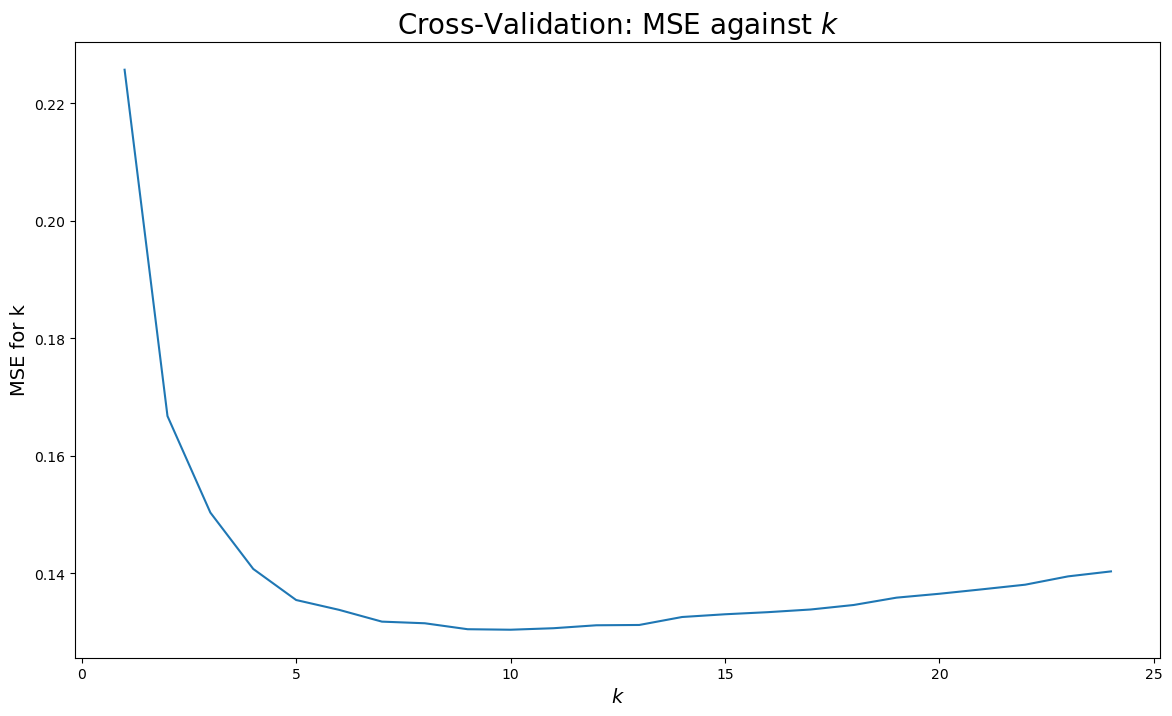

In [267]:
# plot of MSE against k
plt.figure(figsize=(14,8))
plt.plot(np.arange(1, 25), k_scores)
plt.xlabel(r"$k$", size=14)
plt.ylabel("MSE for k", size=14)
plt.title(r"Cross-Validation: MSE against $k$", size=20)
plt.show()

-------------------------------------------------------------------------------

1.4.2

In [268]:
# train and evaluate on optional k
print("In-sample MSE: ",score(X_train, y_train, X_train, y_train, k=optimal_k))
print("Out-sample MSE: ",score(X_train, y_train, X_test, y_test, k=optimal_k))

In-sample MSE:  0.10339964314741246
Out-sample MSE:  0.13095756519909504


### Report:

The in-sample MSE and out-sample MSE are listed in the table below:

|| Linear Regression | Lasso Regression | Elastic Nets Regression |KNN Regression |
|----------|----------|----------|----------|----------|
| In-sample MSE| 0.08226560227369221 | 0.08607082438860097 | 0.0893680816022447 | 0.10339964314741246 |
| Out-sample MSE | 0.08703922891854728 | 0.08607082438860097 |  0.09858065361029375 | 0.13095756519909504 |


For in-sample performance, the MSE relation is:

$$ LSR < LASSO < ELASTICNETS < KNN $$

- KNN is a non-parametric model, which means it doesn't assume any relation between features(unlike linear relation for LSR). The reason it fits the training data with the highest MSE could be therefore the lack of power to catch the relations btween the features and the outcomes.

- LASSO and ELASTICNETS are regularization techniques, which penalizes the `beta` coefficients. Then it's ecpected they behave better than LSR.

- The reason why LASSO performs better than ELASTICNETS could be that LASSO penalizes norm_1 with weight $1*\lambda$ while ELASTICNETS penalizes with weight less than $\lambda$, and penalizes norm_2 which in fact doens't contribute the loss function much.

For out-sample performance, the MSE relation is:

$$ LSR < LASSO < ELASTICNETS < KNN $$

- LASSO, compared with LSR, tends to give a sparse model as it shrinks some of the coefficients to 0, leading the underfit problem. So it's possible it has a higher out-sample MSE than LSR.

- Note the out-sample MSE for ELASTICNETS is greater than that of LASSO. Normally it's the opposite, as ELASTICNETS introduces a balance term $\alpha$ so it trades overfit resulted from $||\beta||_2$ off with underfit brought by $||\beta_1||$. The reason for the observation here could be that it introduces weight $\alpha=0.5$ and the value of $\alpha$ is set not well enough to balance between the overfit and the underfit.

-------------------------------------------------------------------------------

## Task 2: Classification  (50 marks)



### 2.1 Random forest (20 marks)

Before the task, handle and process the data first.

Shape of train dataset (273, 15)
Shape of test dataset (117, 15)


patient_number  cholesterol  glucose  hdl_chol  chol_hdl_ratio  age  \
0             115          224       85        30             7.5   36   
1             318          194       95        36             5.4   63   
2              73          207       75        44             4.7   30   
3              69          144       81        28             5.1   30   
4             326          181      177        24             7.5   64   

   height  weight   bmi  systolic_bp  diastolic_bp  waist  hip  \
0      69     205  30.3          150            99     37   41   
1      58     210  43.9          140           100     44   53   
2      72     180  24.4          118            62     35   41   
3      72     165  22.4          118            78     31   38   
4      71     225  31.4          130            66     44   47   

   waist_hip_ratio     diabetes  
0             0.90  No diabetes  
1             0.83  No diabetes  
2             0.85  No diabetes  
3             0.82  No diabetes  
4             0.94     Diabetes

Any duplicated rows in train dataset: False
Any duplicated rows in test dataset: False


patient_number  cholesterol  glucose  hdl_chol  chol_hdl_ratio  age  \
0             115          224       85        30             7.5   36   
1             318          194       95        36             5.4   63   
2              73          207       75        44             4.7   30   
3              69          144       81        28             5.1   30   
4             326          181      177        24             7.5   64   

   height  weight   bmi  systolic_bp  diastolic_bp  waist  hip  \
0      69     205  30.3          150            99     37   41   
1      58     210  43.9          140           100     44   53   
2      72     180  24.4          118            62     35   41   
3      72     165  22.4          118            78     31   38   
4      71     225  31.4          130            66     44   47   

   waist_hip_ratio     diabetes  
0             0.90  No diabetes  
1             0.83  No diabetes  
2             0.85  No diabetes  
3             0.82  No diabetes  
4             0.94     Diabetes

glucose  chol_hdl_ratio  age  height  weight   bmi  systolic_bp  \
0       85             7.5   36      69     205  30.3          150   
1       95             5.4   63      58     210  43.9          140   
2       75             4.7   30      72     180  24.4          118   
3       81             5.1   30      72     165  22.4          118   
4      177             7.5   64      71     225  31.4          130   

   diastolic_bp  waist_hip_ratio  diabetes  
0            99             0.90       0.0  
1           100             0.83       0.0  
2            62             0.85       0.0  
3            78             0.82       0.0  
4            66             0.94       1.0

<Figure size 1500x1000 with 0 Axes>

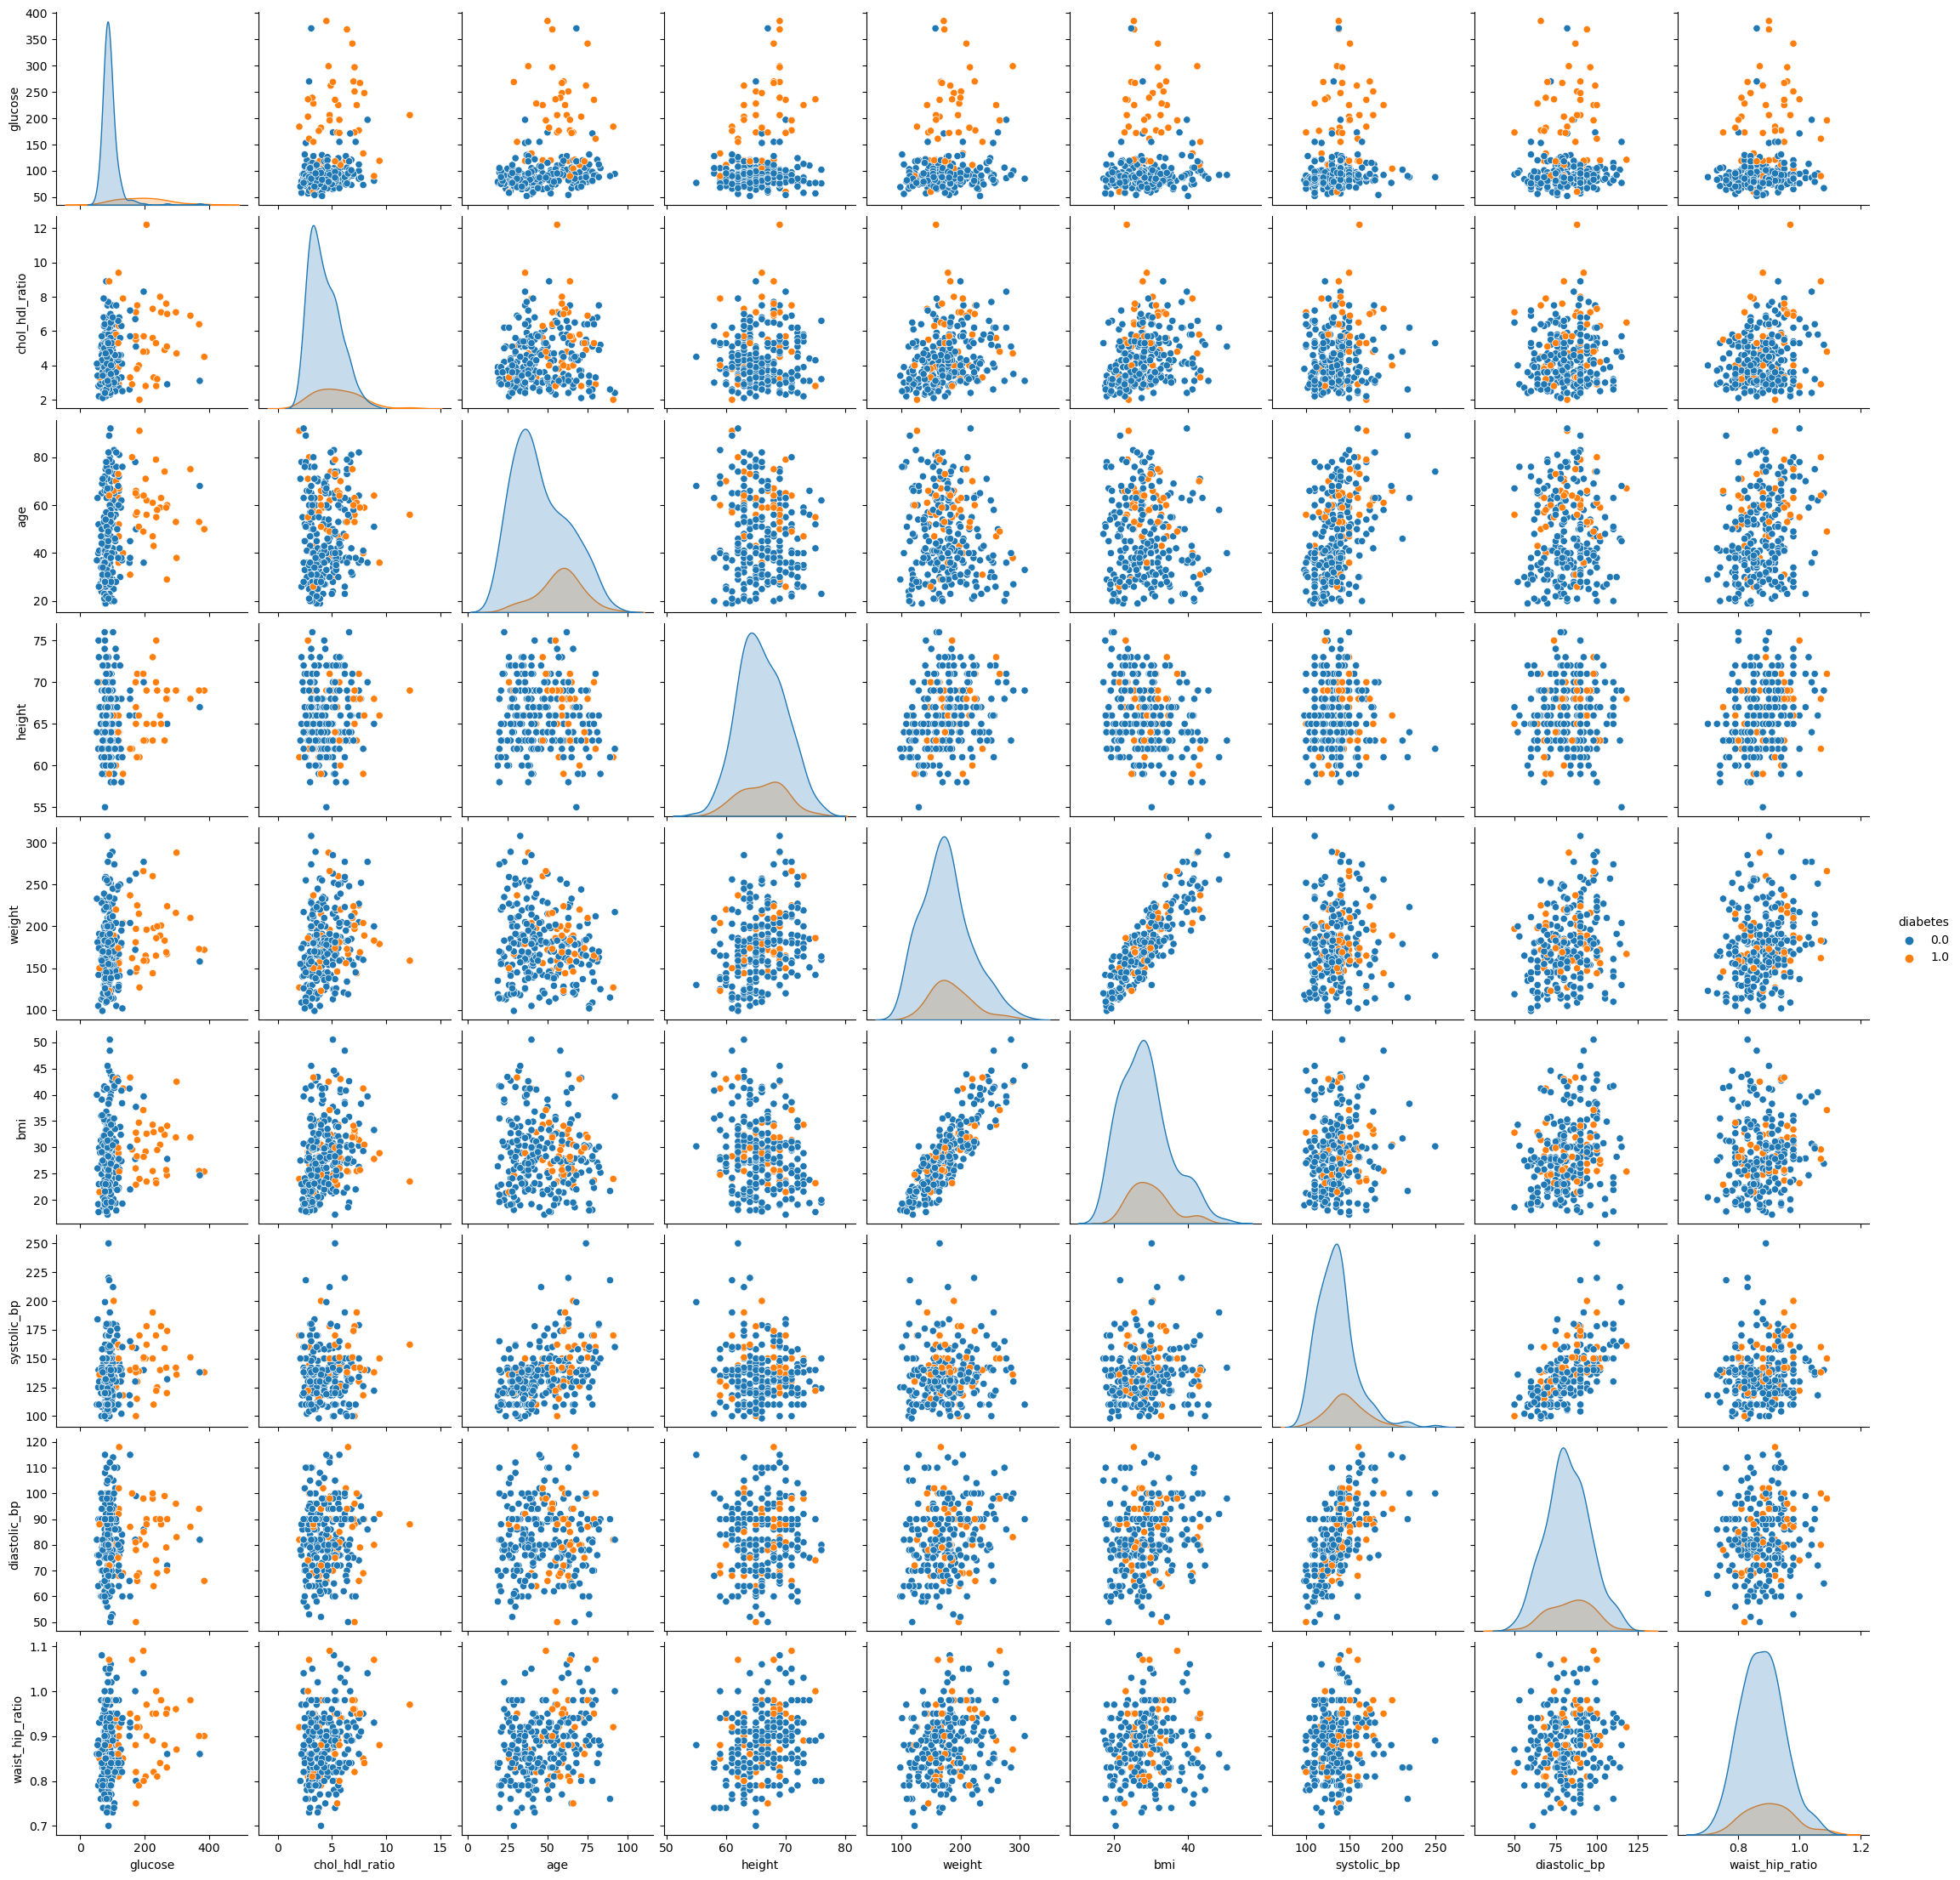

Shape of X_train, y_train: (273, 9) (273,)
Shape of X_test, y_test:  (117, 9) (117,)


In [460]:
# read data as pandas data frames, and refine comma to decimal symbols
diabetes_train = pd.read_csv("diabetes_samples.csv", decimal=",")
diabetes_test = pd.read_csv("diabetes_test.csv", decimal=",")

# Partial info about the data
print("Shape of train dataset", diabetes_train.shape)
print("Shape of test dataset", diabetes_test.shape)
display(diabetes_train.head(5))


# Check duplicates
print("Any duplicated rows in train dataset:",diabetes_train.duplicated().any())
print("Any duplicated rows in test dataset:",diabetes_test.duplicated().any())
# check
display(diabetes_train.head(5))

# drop some columns, as they provide useless info in this task, such as patient number
# drop some columns which provide repeated batches of info, which will lead to colinearity of the features
diabetes_train = diabetes_train.drop(['patient_number','waist','hip','cholesterol','hdl_chol'], axis=1)
diabetes_test = diabetes_test.drop(['patient_number','waist','hip','cholesterol','hdl_chol'], axis=1)

# Change the target to numerical data using indicator variable
diabetes_map = {'Diabetes': 1.0, 'No diabetes': 0.0}
diabetes_train['diabetes'] = diabetes_train['diabetes'].map(diabetes_map)
diabetes_test['diabetes'] = diabetes_test['diabetes'].map(diabetes_map)
display(diabetes_train.head(5))

# Visualization
sns.pairplot(diabetes_train,hue='diabetes')
plt.show()


# Data processing
# split inout and output
X_train = diabetes_train[diabetes_train.columns[:-1]]
y_train = diabetes_train[diabetes_train.columns[-1]]
X_test = diabetes_test[diabetes_test.columns[:-1]]
y_test = diabetes_test[diabetes_test.columns[-1]]

# to np array for computation conveniences
y_train = y_train.astype(int)
y_test = y_test.astype(int)
print("Shape of X_train, y_train:", X_train.shape, y_train.shape)
print("Shape of X_test, y_test: ", X_test.shape, y_test.shape)

# Normalization
train_mean, train_std = np.mean(X_train, 0), np.std(X_train, 0)
X_train = standardize(X_train)
X_test = (X_test - train_mean) / train_std

# Define training weights
training_weights = np.ones_like(y_train) / len(y_train)

# Define columns_dict to check for categorical data
columns_dict = {index: False for index in range(X_train.shape[1])} 

### 2.2.1
In this section, a random forest classifier is constructed, and the hyperparameter $B$ (the number of trees) and the $depth$ is found using grid search.

In [359]:
# own version
def cross_entropy(y, sample_weights):
    """
    Return the cross entropy of a set of samples with their weights.
    Args:
        y: vector of labels
        sample_weights: a list of weights
    """
    # cumulative weights for labels in y  
    label_weights = {yi: 0 for yi in set(y)} 
    for yi, wi in zip(y, sample_weights):
        label_weights[yi] += wi

    # initialization
    total_weight = sum(label_weights.values())
    entropy = 0

    # compute the value of CE
    for label, weight in label_weights.items():
        prob = weight / total_weight
        entropy -= prob*np.log2(prob)

    return entropy

In [360]:
# using the code available in coding tasks
def split_samples(X, y, sample_weights, column, value, categorical):
    """
    Return the split of data depending on the type the column feature. The nth splited sample:
        1. equals value, if `column` is categorical, or
        2. less than value, if `column` is  numerical

        tuple(np.array, np.array): a tuple of subsets of X splitted based on column-th value.
        tuple(np.array, np.array): a tuple of subsets of y splitted based on column-th value.
            tuple(np.array, np.array): a tuple of subsets of sample weights based on column-th value.

        Args:
        X: training features, of shape (N, D).
        y: a vector of training labels, of shape (N,).
        sample_weights: weights for each sample, of shape (N,).
        column: the column of the feature for splitting.
        value: threshold for splitting the samples.
        categorical: boolean value indicating whether column is a categorical or numerical.
    """ 
    if categorical:
        left_mask =(X[:, column] == value)  
    else:
        left_mask = (X[:, column] < value)
    
    X_left, X_right = X[left_mask, :], X[~left_mask, :]
    y_left, y_right = y[left_mask], y[~left_mask]
    w_left, w_right  = sample_weights[left_mask], sample_weights[~left_mask]

    return (X_left, X_right), (y_left, y_right), (w_left, w_right)

In [365]:
# find the best split based on the cross entropy (own version)
def cross_entropy_split_value(X, y, sample_weights, column, categorical):
    """
    Return the Cross-entropy value based on `column` with the split value that minimizes the entropy.
    Args:
        X: training data of shape (N, D).
        y: vector of training labels of shape (N,).
        sample_weights: weights for each sample in training data of shape (N,).
        column: the column of the feature for calculating. 0 <= column < D
        categorical: boolean value indicating whether column is categorical or numerical.
    """
    unique_vals = np.unique(X[:, column])
    assert len(unique_vals) > 1, f"There must be more than one distinct feature value. Given: {unique_vals}."

    # initialization
    entropy_val, threshold = np.inf, None

    # split the values of i-th feature and calculate the cost 
    for value in unique_vals:
        (X_l, X_r), (y_l, y_r), (w_l, w_r) = split_samples(X, y, sample_weights, column, value, categorical) 

        # if one of the two sides is empty, skip this split.
        if len(y_l) == 0 or len(y_r) == 0:
            continue

        p_left = sum(w_l)/(sum(w_l) + sum(w_r))
        p_right = 1 - p_left
        new_cost = p_left * cross_entropy(y_l, w_l) + p_right * cross_entropy(y_r, w_r) 
        if new_cost < entropy_val:
            entropy_val, threshold = new_cost, value

    return entropy_val, threshold


In [381]:
# code from coding tasks
def cross_entropy_split_rf(n_features, X, y, sample_weights, columns_dict):
    """
    Return:
      (float, int, float): the minimized gini-index, the best feature index and value used in splitting.
    Args:
      n_features: number of sampled features.
      X: training features, of shape (N, D).
      y: vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
      columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
    """
    # initialization
    min_entropy_index, split_column, split_val = np.inf, None, 0

    # randomly select features
    columns = np.random.choice(list(columns_dict.keys()), n_features, replace=False)
    columns_dict = {c: columns_dict[c] for c in columns} 
  
    # iterate through the columns
    for column, categorical in columns_dict.items():
    # skip the column if samples are not seperable by that column, i.e., the values in the column are the same
        if len(np.unique(X[:, column])) < 2:
            continue

        # find the optimal splitting value for the given column
        entropy, val = cross_entropy_split_value(X, y, sample_weights, column, categorical)  
        if entropy < min_entropy_index:
            min_entropy_index, split_column, split_val = entropy, column, val

    return split_column, split_val

In [368]:
# find majority classes in one area  (code from coding tasks)
def majority_vote(y, sample_weights):
    """
    Return the label which appears the mostly frequent in y: (int).
    Args:
        y: the vector of training labels, of shape (N,).
        sample_weights: weights for each sample in training data, of shape (N,).
    """
    majority_label = {yi: 0 for yi in set(y)}  # yi = 0 or 1, using dict here to deal with weight

    # add weights to each sample
    for yi, wi in zip(y, sample_weights):
        majority_label[yi] += wi 
        
    # return the label with the highest weight 
    return max(majority_label, key=majority_label.get)

In [369]:
# build the decision tree (code from coding tasks)
def build_tree_rf(n_features, X, y, sample_weights, columns_dict, feature_names, depth,  max_depth=10, min_samples_leaf=2):
    """Build the decision tree according to the data.
    Args:
        X: (np.array) training features, of shape (N, D).
        y: (np.array) vector of training labels, of shape (N,).
        sample_weights: weights for each samples, of shape (N,).
        columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
        feature_names (list): record the name of features in X in the original dataset.
        depth (int): current depth for this node.
    Returns:
        (dict): a dict denoting the decision tree (binary-tree). Each node has seven attributes:
        1. 'feature_name': The column name of the split.
        2. 'feature_index': The column index of the split.
        3. 'value': The value used for the split.
        4. 'categorical': indicator for categorical/numerical variables.
        5. 'majority_label': For leaf nodes, this stores the dominant label. Otherwise, it is None.
        6. 'left': The left sub-tree with the same structure.
        7. 'right' The right sub-tree with the same structure.
        Example:
            mytree = {
                'feature_name': 'petal length (cm)',
                'feature_index': 2,
                'value': 3.0,
                'categorical': False,
                'majority_label': None,
                'left': {
                    'feature_name': str,
                    'feature_index': int,
                    'value': float,
                    'categorical': bool,
                    'majority_label': None,
                    'left': {..etc.},
                    'right': {..etc.}
                }
                'right': {
                    'feature_name': str,
                    'feature_index': int,
                    'value': float,
                    'categorical': bool,
                    'majority_label': None,
                    'left': {..etc.},
                    'right': {..etc.}
                }
            }
    """
    # if reaching any of the stopping criteria, return the label by Majority Rule
    if len(np.unique(y)) == 1 or depth>=max_depth or len(X)<=min_samples_leaf:
        return {'majority_label': majority_vote(y, sample_weights)}

    split_index, split_val = cross_entropy_split_rf(n_features, X, y, sample_weights, columns_dict) # random 

    # If CE is infinity, due to the log term in the formula,\
    # it indicates the samples cannot be seperated by the sampled features.
    if split_index is None:
        return {'majority_label': majority_vote(y, sample_weights)}
    categorical = columns_dict[split_index]
    (X_l, X_r), (y_l, y_r), (w_l, w_r) = split_samples(X, y, sample_weights, split_index, split_val, categorical)
    
    return {
          'feature_name': feature_names[split_index],
          'feature_index': split_index,
          'value': split_val,
          'categorical': categorical,
          'majority_label': None,
          'left': build_tree_rf(n_features, X_l, y_l, w_l, columns_dict, feature_names, depth + 1, max_depth, min_samples_leaf),
          'right': build_tree_rf(n_features, X_r, y_r, w_r, columns_dict, feature_names, depth + 1, max_depth, min_samples_leaf)
      }

In [370]:
# classify a single sample with the trained decision tree (code from coding tasks)
def train_rf(B, n_features, X, y,  columns_dict, sample_weights=None, max_depth=10):
    """
    Return the predicted testing sample label:(int).
    Args:
        tree: the built decision tree.
        x: (pd.Dataframe), a single sample, of shape (D,).
    """
    if sample_weights is None:
        # assume uniform weights if sample_weights is not provided
        sample_weights = np.ones(X.shape[0]) / X.shape[0]
    else:
        sample_weights = np.array(sample_weights) / np.sum(sample_weights)

    feature_names = X.columns.tolist()
    X = X.to_numpy()
    y = y.to_numpy()
    N = X.shape[0]
    training_indices = np.arange(N)
    trees = []

    for _ in range(B):
        sample = np.random.choice(training_indices, N, replace=True)
        X_sample = X[sample, :]
        y_sample = y[sample]
        w_sample = sample_weights[sample]
        tree = build_tree_rf(n_features, X_sample, y_sample, w_sample, columns_dict, feature_names, depth=1, max_depth=max_depth)
        trees.append(tree)
    
    return trees 

In [371]:
# classify a single sample with the fitted decision tree (code from coding tasks)
def classify(tree, x):
    """
    Return the predicted testing sample label:(int).
    Args:
        tree: the built decision tree.
        x: (pd.Dataframe), a single sample, of shape (D,).
    """
    # If the node is a leaf node, return the majority label
    if tree['majority_label'] is not None: 
        return tree['majority_label']

    # Recursively classify x
    elif tree['categorical']: 
        # if categorical, we compare using equality
        if x[tree['feature_index']] == tree['value']:
            return classify(tree['left'], x)
        else:
            return classify(tree['right'], x) 

    else:
        if x[tree['feature_index']] < tree['value']: 
            return classify(tree['left'], x)
        else:
            return classify(tree['right'], x)

In [372]:
def aggregate(decisions):
    """
    Return the label with the maximal counts and the dictionary for the labels which records the frequency of each label.
    """
    # initialize a default dict to count the frequency of each decision
    count = defaultdict(int)

    for decision in decisions:
        count[decision] += 1

    # Return the decision with highest frequency, and the frequency of all decisions
    return max(count, key=count.get), count

In [373]:
def rf_predict(rf, X):
    """
    Return: (np.array): predicted label(s) for a (sequence of) data X via majority rule.
    Args:
        rf: a random forest classifier of size B.
        X: (pd.Dataframe), out-of-samples of shape (N, D).
    """
    # Convert to np.ndarray
    if type(X) != np.ndarray:
        X = X.to_numpy()
    
    # If only one sample, return the predicted class label
    if len(X.shape) == 1:
        return aggregate([classify(tree, X) for tree in rf])
    # recursion down
    else:
        # for each observation, we need to aggregate the final votes
        return [aggregate([classify(tree, x) for tree in rf]) for x in X]

In [374]:
# adapted from codes on coding books
def rf_score(rf, X_test, y_test):
    """ 
    Return: (float) the accuracy of the random forest.
    Args:
        rf: A trained random forest.
        X_test: test samples of shape (N, D).
        y_test: the vector of testing label of shape (N,).
    """
    # convert to np.ndarrays if necessary
    if type(X_test) != np.ndarray:
        X_test = X_test.to_numpy()
    if type(y_test) != np.ndarray:
        y_test = y_test.to_numpy()
    
    # Make predictions for the test data
    predictions = rf_predict(rf, X_test) 
    y_pred = np.array([pred[0] for pred in predictions])
    
    # Compute the accuracy score as the proportion of correct predictions
    return np.mean(y_pred == y_test)

In [375]:
# compute random forest recall, specificity, accuracy, precision, f-score, confusion matrix (adapted from codes in coding tasks)
def rf_quality(y_pred, y_true):
    """ 
    Returns the recall, specificity, accuracy, precision, f-score, and confusion matrix of the random forest.
    Args:
        y_pred: predicted labels for test samples, of shape (N,).
        y_true: vector of true test labels, of shape (N,).
    """
    if type(y_pred) != np.ndarray:
        y_pred = y_pred.to_numpy()
    if type(y_true) != np.ndarray:
        y_true = y_true.to_numpy()

    # Convert to boolean for computation conveniences
    y_pred = y_pred > 0
    y_true = y_true > 0

    # true positives, true negatives, false positives, and false negatives
    tp = np.sum(y_pred & y_true)
    tn = np.sum((~y_true) & (~y_pred))
    fp = np.sum((~y_true) & y_pred)
    fn = np.sum(y_true & (~y_pred))

    # recall, specificity, accuracy, precision, and F-score
    recall = tp / (tp + fn)
    specificity = tn / (tn + fp)
    accuracy = (tn + tp) / len(y_true)
    precision = tp / (tp + fp)
    fscore = 2 * (precision * recall) / (precision + recall)

    # confusion matrix
    confusion_matrix = np.array([[tp, fp], [fn, tn]])

    # Return results as a tuple
    return (recall, specificity, accuracy, precision, fscore, confusion_matrix)

In [376]:
# compute the cross validation score for random forest (own version)
def rf_cross_validation_score(X_train, y_train, folds, B, n_features, columns_dict, max_depth, sample_weights=None):
    """ 
    Return: (float) the average accuracy for 4-fold cv of the random forest.
    Args:
        X_train: training sample features, of shape (N, D).
        y_train: vector of training labels, of shape (N,).
        fold_index: list containing indexes for each split
        B: number of trees in the forest
        n_features: number of features to consider at each split
        columns_dict: a dictionary that maps column names to column indexes
        max_depth: maximum depth of the tree
        sample_weights: a vector of sample weights
    """
    scores = []

    for i in range(len(folds)):
        val_indexes = folds[i]
        train_indexes = list(set(range(y_train.shape[0])) - set(val_indexes))

        # spliting training and validation sets
        X_train_i = X_train.iloc[train_indexes, :]
        y_train_i = y_train.iloc[train_indexes]
        X_val_i = X_train.iloc[val_indexes, :] 
        y_val_i = y_train.iloc[val_indexes]

        # Train the random forest on the training set
        rf = train_rf(B, n_features, X_train_i, y_train_i, columns_dict, max_depth=max_depth, sample_weights=sample_weights)

        # the score of the forest on the validation set
        score_i = rf_score(rf, X_val_i, y_val_i)
        scores.append(score_i)

    # return the mean of the scores
    return np.mean(scores)

In [377]:
# recall the function defined in task 1 that generates random folds
def cross_val_split(N, num_folds):
    """
    Return a list of arrays containing the indices of the length of the data.
    Args:
       N: (int) length of the data
       num_folds: (int) number of folds
    """
    fold_size = N // num_folds
    index_perm = np.random.permutation(np.arange(N))
    folds = []
    for k in range(num_folds-1):
        folds.append(index_perm[k*fold_size: (k+1)*fold_size])
    # the remaining samples given to the last fold
    folds.append(index_perm[(num_folds-1)*fold_size: ]) 
    return folds

In [378]:
# grid search all combinations on the input B range and depth range
def grid_search_rf(X_train, y_train, folds, B_range, n_features, columns_dict, depth_range, sample_weights=None):
    """
    Return the optimal value pair for B and tree depth(tuple) and the corresponding cross validation scores(dict).
    Args:
        X_train: training samples, of shape (N, D).
        y_train: vector of labels for the traiing sample, of shape (N,).
        fold_index: list containing indexes for each split
        B_range: a list of B values.
        n_features: number of features to consider at each split
        columns_dict: a dictionary that maps column names to column indexes
        depth_range: a list of depth values
        sample_weights: a vector of sample weights.
    """
    # initialize a dict to hold all possible pairs of (B, depth)
    grid_scores = defaultdict(float)
    i = 0

    for B in B_range:
        for depth in depth_range:
            i += 1
            print("evaluation {i} starts:")
            # the cross-validation score for this (B, max_depth) pair
            grid_scores[(B, depth)] = rf_cross_validation_score(X_train, y_train, folds, B, n_features, columns_dict, depth, sample_weights=sample_weights)
            print("(trees, depth): {B}, score: {depth} evaluation {grid_scores[(B, depth)]} ends")
    
    opt_pair = max(grid_scores, key=grid_scores.get)
    
    return opt_pair, grid_scores

Now we split the data into 4 folds randomly, and implement grid search to find the optimal pair (B, depth) on the range:

B_range: np.arange(5,50,5) and depth_range: np.arange(1,50,5)

In [382]:
# grid search on B_range and depth_range chosen as:
B_range = np.arange(5,50,5)
depth_range = np.arange(1,50,5)
columns_dict = {index: False for index in range(X_train.shape[1])} 

# implement the grid search with 4-fold cv on data
folds = cross_val_split(X_train.shape[0], 4)
n_features = X_train.shape[1] // 3

opt_pair, cv_scores = grid_search_rf(X_train, y_train, folds, B_range, n_features, columns_dict, depth_range)

evaluation 1 starts:
(trees, depth): (5, 1), score: 0.8388213981244672 evaluation 1 ends
evaluation 2 starts:
(trees, depth): (5, 6), score: 0.886349104859335 evaluation 2 ends
evaluation 3 starts:
(trees, depth): (5, 11), score: 0.8900788576300085 evaluation 3 ends
evaluation 4 starts:
(trees, depth): (5, 16), score: 0.8826726342710998 evaluation 4 ends
evaluation 5 starts:
(trees, depth): (5, 21), score: 0.9011082693947144 evaluation 5 ends
evaluation 6 starts:
(trees, depth): (5, 26), score: 0.8607203751065643 evaluation 6 ends
evaluation 7 starts:
(trees, depth): (5, 31), score: 0.8901321398124467 evaluation 7 ends
evaluation 8 starts:
(trees, depth): (5, 36), score: 0.8828857630008524 evaluation 8 ends
evaluation 9 starts:
(trees, depth): (5, 41), score: 0.8937553282182438 evaluation 9 ends
evaluation 10 starts:
(trees, depth): (5, 46), score: 0.868073316283035 evaluation 10 ends
evaluation 11 starts:
(trees, depth): (10, 1), score: 0.8388213981244672 evaluation 11 ends
evaluation

(trees, depth): (45, 46), score: 0.8900788576300085 evaluation 90 ends


In [420]:
optimal_B = opt_pair[0]
optimal_depth = opt_pair[1]
print(f"Optional tree number: {optimal_B}")
print(f"Optional depth: {optimal_depth}")
print(f"Optional cv accuracy: {cv_scores[optimal_B,optimal_depth]*100:.3f}%")

Optional tree number: 10
Optional depth: 31
Optional cv accuracy: 91.949%


### Report:
The optimal B and depth are reported in the chunk above.

The searching results, to some extent, depend on the range of B and depth chosen for this part. If time permits, will try more pairs of ranges.

--------------------------------------------------------------------------------------------------------------------------------

### 2.1.2
In this section, quality measures are computed for both the training and test data set with optimized $B$ and depth. Rare-Class Learning Problem (RCLP) is reveled in this section, which could lead to an un-robust model.

In [386]:
# train the model on the full training data using the optimal parameters
n_features = X_train.shape[1] // 3
B = optimal_B
depth = optimal_depth

forest = train_rf(B, n_features, X_train, y_train, columns_dict, sample_weights=None, max_depth=depth)

In [387]:
# measures of quality
predictions = rf_predict(forest, X_train) 
y_pred_train = np.array([pred[0] for pred in predictions])

train_rf_quality = rf_quality(y_pred_train, y_train)

predictions = rf_predict(forest, X_test)
y_pred_test = np.array([pred[0] for pred in predictions])
test_rf_quality = rf_quality(y_pred_test, y_test)

# measures of quality: training set
print("For training set:")
print('Training recall:', train_rf_quality[0])
print('Training specificity:', train_rf_quality[1])
print('Training accuracy:', train_rf_quality[2])
print('Training precision:', train_rf_quality[3])
print('Training F-score:', train_rf_quality[4]) 
print('Confusion Matrix: \n ', train_rf_quality[5])

# measures of quality: test set
print("For test set:")
print('Test recall:', test_rf_quality[0])
print('Test specificity:', test_rf_quality[1])
print('Test accuracy:', test_rf_quality[2])
print('Test precision:', test_rf_quality[3])
print('Test F-score:', test_rf_quality[4]) 
print('\nConfusion Matrix:', test_rf_quality[5])

For training set:
Training recall: 0.9090909090909091
Training specificity: 1.0
Training accuracy: 0.9853479853479854
Training precision: 1.0
Training F-score: 0.9523809523809523
Confusion Matrix: 
  [[ 40   0]
 [  4 229]]
For test set:
Test recall: 0.5625
Test specificity: 0.9801980198019802
Test accuracy: 0.9230769230769231
Test precision: 0.8181818181818182
Test F-score: 0.6666666666666666
Confusion Matrix: 
  [[ 9  2]
 [ 7 99]]


### Report:
Generally, it can be seen from the confusion matrix that the model performs well on both the training and the test data, with high accuracies. 

However, it has "rare-class learning problem" (RCLP) on the positive class. So the accuracy is not the only quality measure to judge the performance of the model.

- Recall:

The training set has a high recall, which means that the model diagonalizes a patient with `diabetes` correctly. The recall for the  test set is much lower. The reason could be the following two:
 1. The information for the positive class or the training set has been captured so well that it becomes highly sensitive to outliers and noise and loses its power to generalization to the test data.
 2. Due to RCLP, the model performs well only to data distributions like that in the training data. And the distribution is quite different for the test data. The model then deals bad to the test data.
 
 - Specificity:
 
The spcificity is high for noth two data sets, and it's higher for the training data. This could mean that the model is trained well on the negative class and doesn't lose the power to fit unseen data.
 
 - Precision:
 
The precision is high for both data sets, and it's higher for the training data set. This is ecpected, as a great value of precision means more TPs are assigned within all predicted positives, and more patients will be correctly diagonized as `diabetes` in practice, and thus reducing the wate of healthcare resoures.

- F score:

F score, as a harmonic mean of recall and precision, rewards a model with similar recall and precision. So a high F score is expected to see for the training data as it has high a recall and precision. The F score is lower for the test data because it's been dragged down by a relatively smaller precision and a recall, which could be attributed to RCLP or overfitting of the training data.

To summarize, the data trained the training set with the optimal B and depth performs so well that it causes overfitting and loses the generalization to the test data. Given a greater number of the positive class, we should expect a decrease in recall.

-------------------------------------------------------------------------------

### 2.1.3
In terms of RCLP, we first demonstrate by getting the class weights and then deal it with adjusted weights. In this section, two models with original weights and adjusted weights are compared using ROC and Precision-Recall Curve.

- Plotting ROC:

ROC was first introduced in logistic regression, and it's a function of possible values of the logistic regression as thresholds to compute TPR and FPR. In RF classifier, the model returns label values instead of numerical values. To deal with this, we came up with computing the densities of the label 1 in each tree in a forest, and stored in a list as thresholds to scan.

In [388]:
def compute_frequency(y):
    ''' 
    Return the frequancy of each class
    Args:
        y: a list of labels
    '''
    frequency = np.zeros(2)  # binary classification, so 2 classes
    for i in range(len(y)):
        frequency[y[i]] += 1
    return frequency

In machine learning, acoording to online resources, for a 'balanced' data set the model automatically assigns the class weights inversely proportional to their respective frequencies. We use this method to adjust the given unbalanced data set.

In [389]:
def get_class_weight(labels_dict):
    '''
    Return: (dict) the weight for each class.
    Args:
        labels_dict: a dictionary of labels and number of each class
    '''
    total_num = sum(labels_dict.values())
    class_weight = dict()
    for key, value in labels_dict.items():
        # re-assign the weights inversely proportional to the frequency of the class
        score = total_num / (len(labels_dict)*value)
        class_weight[key] = score
    return class_weight

In [390]:
# demonstrate the unbalanced weights between two classes
patient_number = compute_frequency(y_train)
freq = patient_number / len(y_train)
print(f"number of Non-diabetes patients: {patient_number[0]}; number of Diabetes patients: {patient_number[1]}")
print(f"\nfrequency of Non-diabetes patients: {freq[0]}; frequency of Diabetes patients: {freq[1]}")

# give appropriate class weights to balance the data outcomes
labels_dict = {0: patient_number[0], 1: patient_number[1]}
class_weight = get_class_weight(labels_dict)
print("\nClass weight: ", class_weight)

labels_dict[0] *= class_weight[0]
labels_dict[1] *= class_weight[1]
print("\nPatient number with adjusted weights: ",labels_dict )

# compute the training weights using adjusted weights
training_weights = np.zeros(len(y_train))
for i in range(len(y_train)):
    training_weights[i] = class_weight[y_train[i]]

number of Non-diabetes patients: 229.0; number of Diabetes patients: 44.0

frequency of Non-diabetes patients: 0.8388278388278388; frequency of Diabetes patients: 0.16117216117216118

Class weight:  {0: 0.5960698689956332, 1: 3.102272727272727}

Patient number with adjusted weights:  {0: 136.5, 1: 136.5}


In [392]:
# use the adjusted weights to grid search B and depth
folds = cross_val_split(X_train.shape[0], 4)
n_features = X_train.shape[1] // 3
B_range = np.arange(5,30,5)
depth_range = np.arange(1,50,5)
columns_dict = {index: False for index in range(X_train.shape[1])} 

opt_pair, cv_scores = grid_search_rf(X_train, y_train, folds, B_range, n_features, columns_dict, depth_range, sample_weights=training_weights)

evaluation 1 starts:
(trees, depth): (5, 1), score: 0.8389279624893435 evaluation 1 ends
evaluation 2 starts:
(trees, depth): (5, 6), score: 0.8975383631713555 evaluation 2 ends
evaluation 3 starts:
(trees, depth): (5, 11), score: 0.8792092924126171 evaluation 3 ends
evaluation 4 starts:
(trees, depth): (5, 16), score: 0.9049978687127025 evaluation 4 ends
evaluation 5 starts:
(trees, depth): (5, 21), score: 0.8902919863597614 evaluation 5 ends
evaluation 6 starts:
(trees, depth): (5, 26), score: 0.8901854219948849 evaluation 6 ends
evaluation 7 starts:
(trees, depth): (5, 31), score: 0.8865089514066496 evaluation 7 ends
evaluation 8 starts:
(trees, depth): (5, 36), score: 0.9010549872122763 evaluation 8 ends
evaluation 9 starts:
(trees, depth): (5, 41), score: 0.8756393861892584 evaluation 9 ends
evaluation 10 starts:
(trees, depth): (5, 46), score: 0.9011615515771526 evaluation 10 ends
evaluation 11 starts:
(trees, depth): (10, 1), score: 0.8389279624893435 evaluation 11 ends
evaluati

In [417]:
optimal_B = opt_pair[0]
optimal_depth = opt_pair[1]

print("For balanced data, we have:")
print(f"Optimal trees: {optimal_B}")
print(f"Optimal depth: {optimal_depth}")
print(f"Optimal cv accuracy: {cv_scores[optimal_B, optimal_depth]*100:.3f}%")

For balanced data, we have:
Optimal trees: 10
Optimal depth: 31
Optimal cv accuracy: 91.949%


In [402]:
# retrain the model on the optimal hyperparameters
n_features = X_train.shape[1] // 3
B = optimal_B
max_depth = optimal_depth

forest = train_rf(B, n_features, X_train, y_train, columns_dict, max_depth=max_depth, sample_weights=training_weights)

In [403]:
# measures of quality
predictions = rf_predict(forest, X_train) 
y_pred_train = np.array([pred[0] for pred in predictions])

train_rf_quality = rf_quality(y_pred_train, y_train)

predictions = rf_predict(forest, X_test)
y_pred_test = np.array([pred[0] for pred in predictions])
forest_test_quality = rf_quality(y_pred_test, y_test)

# measures of quality: training set
print("For training set:")
print('Training recall:', train_rf_quality[0])
print('Training specificity:', train_rf_quality[1])
print('Training accuracy:', train_rf_quality[2])
print('Training precision:', train_rf_quality[3])
print('Training F-score:', train_rf_quality[4]) 
print('Confusion Matrix: \n ', train_rf_quality[5])

# measures of quality: test set
print("\nFor test set:")
print('Test recall:', forest_test_quality[0])
print('Test specificity:', forest_test_quality[1])
print('Test accuracy:', forest_test_quality[2])
print('Test precision:', forest_test_quality[3])
print('Test F-score:', forest_test_quality[4]) 
print('Confusion Matrix: \n ', forest_test_quality[5])

For training set:
Training recall: 0.9090909090909091
Training specificity: 0.9956331877729258
Training accuracy: 0.9816849816849816
Training precision: 0.975609756097561
Training F-score: 0.9411764705882352
Confusion Matrix: 
  [[ 40   1]
 [  4 228]]

For test set:
Test recall: 0.625
Test specificity: 0.9801980198019802
Test accuracy: 0.9316239316239316
Test precision: 0.8333333333333334
Test F-score: 0.7142857142857143
Confusion Matrix: 
  [[10  2]
 [ 6 99]]


In [404]:
# ROC curve
def roc_curve(y_true, y_pred):
    """ 
    Return:
        auc: area under the curve (AUC).
        tpr_l: a list of true positive rate (TPR) values for each scanned threshold.
        fpr_l: a list of false positive rate (FPR) values for each scanned threshold.
        thresholds: the scanned thresholds sorted descendingly.
    Arguments:
        y_true: the true labels of size (n, )
        y_pred: predicted labels of size (n, ) 
    """
    if type(y_pred) !=np.ndarray:
        y_pred = y_pred.to_numpy()
    if type(y_true) !=np.ndarray:
        y_true = y_true.to_numpy()

    # initialize
    y_true = y_true > 0
    thresholds = np.sort(np.array(list(set(y_pred.squeeze()))))[::-1]
    tpr_l, fpr_l = [], []

    # for different thresholds, compute tpr and fpr
    for thres in thresholds:
        y_threshold = (y_pred >= thres)

        # true positives
        tp = np.sum(y_true & y_threshold)
        # true negatives
        tn = np.sum((~y_true) & (~y_threshold))
        # false positives
        fp = np.sum((~y_true) & y_threshold)
        # false negatives
        fn = np.sum(y_true & (~y_threshold))

        tpr = tp / (tp + fn)
        fpr = fp / (tn + fp) 
        tpr_l.append(tpr)
        fpr_l.append(fpr)

    # compute AUC using Trapezoidal rule
    auc = np.trapz(tpr_l, fpr_l)
    return auc, tpr_l, fpr_l, thresholds

In [405]:
def get_score(forest, X):
    """
    Return the numerical values for scanning in plotting the ROC.
    Args:
    forest: trained RF classifier.
    X: (pa.dataframe/nd.array): data to be predicted.
    """
    predictions = rf_predict(forest, X)
    # get the label count dictionary
    score_dicts = np.array([pred[1] for pred in predictions])
    scores = []
    for dict in score_dicts:
        if 1 not in dict:
            scores.append(0.0)
        else:
            # density of the label 1 in each tree in a forest as numerical values
            scores.append(dict[1]/sum(dict.values()) )
    return np.array(scores)

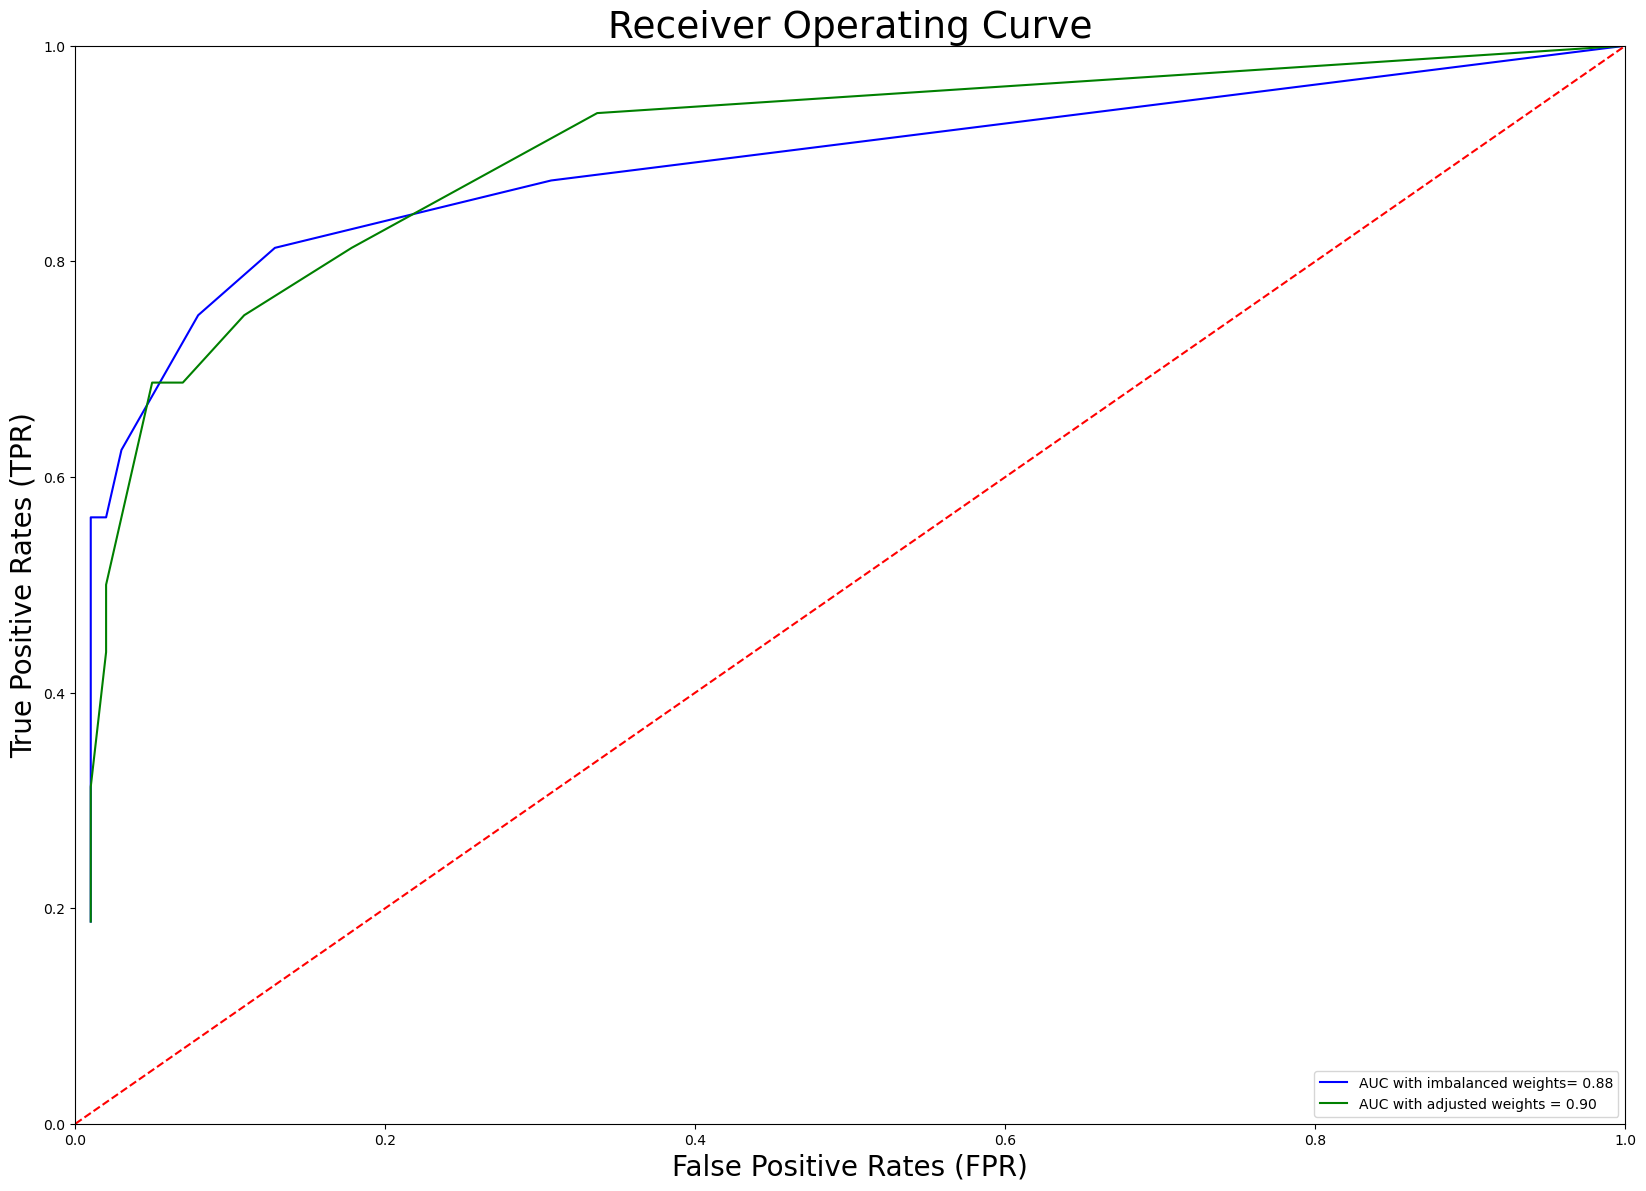

In [406]:
# recall the optimal hyperparameter
n_features = X_train.shape[1] // 3
B = optimal_B
max_depth = optimal_depth

# auc under uniform weights
forest1 = train_rf(B, n_features, X_train, y_train, columns_dict, max_depth=max_depth)
y_pred_1 = get_score(forest1, X_test)
auc1, tpr1, fpr1, th1 = roc_curve(y_test, y_pred_1)

# auc under adjusted weights
forest2= train_rf(B, n_features, X_train, y_train, columns_dict, max_depth=max_depth, sample_weights=training_weights)
y_pred_2 = get_score(forest2, X_test) 
auc2, tpr2, fpr2, th2 = roc_curve(y_test, y_pred_2)

# plotting two ROCs in one figure
plt.figure(figsize=(20,14))
plt.title(f"Receiver Operating Curve", size=27)
plt.plot(fpr1, tpr1, 'b', label = f'AUC with imbalanced weights= {auc1:0.2f}')
plt.plot(fpr2, tpr2, 'g', label = f'AUC with adjusted weights = {auc2:0.2f}')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.ylabel('True Positive Rates (TPR)', size=20)
plt.xlabel('False Positive Rates (FPR)', size=20)
plt.legend(loc = 'lower right')
plt.show()

### Report:
- ROC AND AUC:

ROC is a graphical representation of the performance of a binary classifier. And it's quantifiable by the area under the ROC--called AUC, which ranges form 0 to 1. 

TPR is the proportion of actual positives that are correctly identified by the model. FPR is the proportion of actual negatives that are incorrectly identifiable as positives by the model. For a good binary classifier, TPR should be high and FPR should be low. So, in ROC, this should be plotted with a line that is far from the diagonal and be close to (0,1). The AUC should be therefore close to 1.

- Plot explanation:

From the plot up above several chunks, it's observed that the ROC for both the imbalanced data and the data with adjusted weights have interweaving patterns. But measured by AUC, the AUC value for the adjusted bootstrap (0.90) is slightly bigger than that obtained from standard Bootstrap(0.88), meaning that the model from weighted bootstrap behaves better in this way.

However, there's no fixed standard to define a 'good' or 'excellent' model in terms of the value of AUC. We can only know the relative behavior of two classifiers by comparing their respective value of AUC.

In [412]:
def precision_recall_curve(y_true, y_pred):
    """
    Return:
        auc: area under the curve (AUC).
        tpr_l: a list of true positive rate (TPR) values for each threshold.
        precision_l: a list of precision values for each threshold.
        thresholds: the scanned thresholds sorted descendingly.
    Arguments:
        y_true: the true labels of size (n, )
        y_pred: predicted labels of size (n, ) 
    """
    
    if type(y_pred) !=np.ndarray:
        y_pred = y_pred.to_numpy()

    if type(y_true) !=np.ndarray:
        y_true = y_true.to_numpy()

    # initialize
    y_true = y_true > 0
    thresholds = np.sort(np.array(list(set(y_pred.squeeze()))))[::-1]
    tpr_l, precision_l = [], []

    for thre in thresholds:
        y_thresholded = y_pred >= thre

        # true positives
        tp = np.sum(y_true & y_thresholded)
        # true negatives
        tn = np.sum((~y_true) & (~y_thresholded))
        # false positives
        fp = np.sum((~y_true) & y_thresholded)
        # false negatives
        fn = np.sum(y_true & (~y_thresholded))

        tpr = tp / (tp + fn)
        precision = tp / (tp + fp)
        tpr_l.append(tpr)
        precision_l.append(precision)

        auc = np.trapz(precision_l, tpr_l)
    return auc, precision_l, tpr_l, thresholds

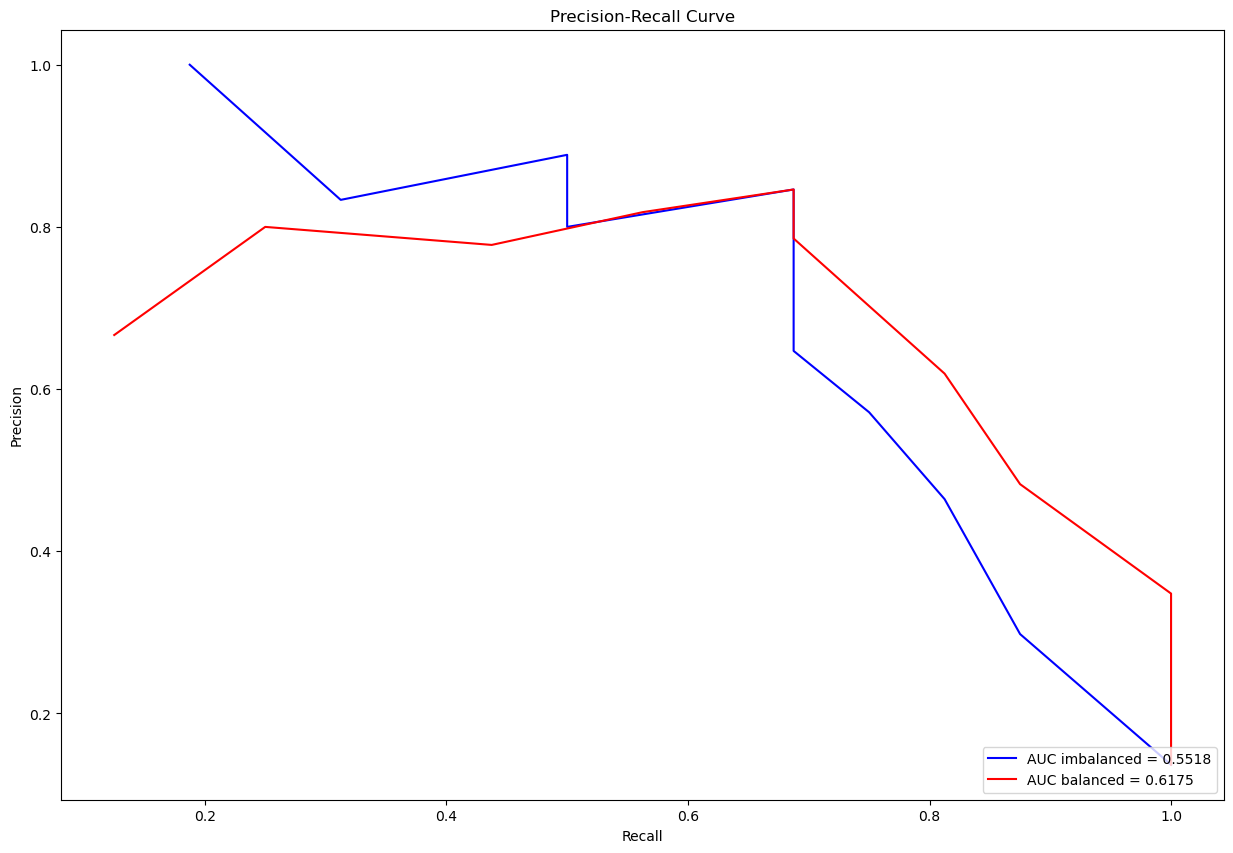

In [462]:
plt.figure(figsize=(15,10))

# under uniform weights
auc1, precision1, recall1, th1 = precision_recall_curve(y_test, y_pred_1)
plt.plot(recall1, precision1, 'blue', label = f'AUC imbalanced = {auc1:0.4f}')

# under adjusted weights
auc1, precision2, recall2, th2 = precision_recall_curve(y_test, y_pred_2)
plt.plot(recall2, precision2, 'r', label = f'AUC balanced = {auc1:0.4f}')

#plotting
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc = 'lower right')
plt.show()

### Report:

- Precision-Recall Curve:

PR curve, like ROC, is a useful graphical representation of the performance of a classifier. And the area under, called AUPRC, which is similar to AUC, is an explicit measure of the performance of a binary classifier. A better classifier has a greater AUPRC.

Precision is the ratio of actual positives to all the predicted positives, and Recall is the ratio of positive predictions to all the actual positives. According to online introductions, typically, when the threshold increases, Recall would decrease and Precision would increase.

- Plot explanation:

It's observed that the AUPRC for adjusted bootstrap is greater than that of from the standard bootstrap, which is expected. This means the classifer trained from the weighted bootstrap performs better.

--------------------------------------------------------------------------------------------------------------------------------

#### 2.2	Support Vector Machine (SVM) (30 marks)

In this section, two versions of SVM are implemented: linear soft-margin SVM and kernelized SVM. The reason behind this is that the distribution of the data is yet to be determined. For each of the two version, we find the optimal feature coefficients, tune the hyperpamaters and assess the model by measures introduced. Further comparisons and optimizations are yet to be carried out if time permits.

### Preliminaries: Data Processing

recall the data processing from 2.1.1

In [8]:
# load data as pandas data frames
dia_train = pd.read_csv('diabetes_samples.csv',decimal=",")
dia_test = pd.read_csv('diabetes_test.csv',decimal=",")

# take a look of the datasets
print("Shape of train dataset", dia_train.shape)
print("Shape of test dataset", dia_test.shape)

# check for any duplicated rows
print("Any duplicated rows in train dataset:",dia_train.duplicated().any())
print("Any duplicated rows in test dataset:",dia_test.duplicated().any())

# Note: convert the target to numbericla values +1 and -1 as set on lecture notes
diabetes_map = {'Diabetes': 1.0, 'No diabetes': -1.0}
dia_train['diabetes'] = dia_train['diabetes'].map(diabetes_map)
dia_test['diabetes'] = dia_test['diabetes'].map(diabetes_map)

# drop the columns as did in 2.1.1, as they either provide useless info or repeated batches of info
diabetes_train= dia_train.drop(['patient_number','waist','hip','cholesterol','hdl_chol'], axis=1)
diabetes_test= dia_test.drop(['patient_number','waist','hip','cholesterol','hdl_chol'], axis=1)

print("Display the cleaned training data:")
display(dia_train.head(5))

# split the featuresa nd the target
X_train, y_train = diabetes_train.iloc[:, :-1], diabetes_train.loc[:, 'diabetes']
X_test, y_test = diabetes_test.iloc[:, :-1], diabetes_test.loc[:, 'diabetes']

# convert to np array
X_train, y_train = X_train.to_numpy(), y_train.to_numpy()
X_test, y_test = X_test.to_numpy(), y_test.to_numpy()

# standardize
train_mean, train_std = np.mean(X_train, 0), np.std(X_train, 0)
X_train = standardize(X_train)
X_test = (X_test - train_mean) / train_std

# insert 1 in every row for intercept b
X_train = np.hstack((X_train, np.ones((len(X_train),1)) ))
X_test = np.hstack((X_test, np.ones((len(X_test),1)) ))   

print("Shape of X_train, X_test: ", X_train.shape, X_test.shape)
print("Shape of y_train, y_test: ", y_train.shape, y_test.shape)

Shape of train dataset (273, 15)
Shape of test dataset (117, 15)
Any duplicated rows in train dataset: False
Any duplicated rows in test dataset: False
Display the cleaned training data:


patient_number  cholesterol  glucose  hdl_chol  chol_hdl_ratio  age  \
0             115          224       85        30             7.5   36   
1             318          194       95        36             5.4   63   
2              73          207       75        44             4.7   30   
3              69          144       81        28             5.1   30   
4             326          181      177        24             7.5   64   

   height  weight   bmi  systolic_bp  diastolic_bp  waist  hip  \
0      69     205  30.3          150            99     37   41   
1      58     210  43.9          140           100     44   53   
2      72     180  24.4          118            62     35   41   
3      72     165  22.4          118            78     31   38   
4      71     225  31.4          130            66     44   47   

   waist_hip_ratio  diabetes  
0             0.90      -1.0  
1             0.83      -1.0  
2             0.85      -1.0  
3             0.82      -1.0  
4             0.94       1.0

Shape of X_train, X_test:  (273, 10) (117, 10)
Shape of y_train, y_test:  (273,) (117,)


2.2.1

In 2.2.1, a soft-margin linear SVM classifier is implemented. To estimate the weights `w`, `sgd` is implemented, whose stopping criterion is based on the value of the loss function given.

In the phase of parameter tuning, the training data is divided into 4 folds, and the $\lambda$ in the loss function, as well as the `learning_rate` in `sgd`, is searched by the method of grid search. The loss, with corresponding $\lambda$ and the learning rate `lr` is then reported.

In [9]:
# from coding books
def calculate_cost_svm(w, X, y, regul_strength=1e6):
    """
    Return the value of the loss function.
    Args:
        w: (lis) weights of the samples.
        X: feature data
        y: labels for the input data
        regul_strength: lambda in the loss funciton.
    """
    n = X.shape[0]
    distances = 1 - y * (X @ w) 
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge = regul_strength * distances.mean() 

    # calculate cost
    return 0.5 * np.dot(w, w) + hinge

In [10]:
# from coding books
def calculate_gradient_svm(w, X_batch, y_batch, regul_strength=1e6):
    """
    Return the gradient of the loss function.
    Args:
        w: weights for the feature samples
        X_batch, y_batch: input and output data
        regul_strength: lambda in the loss function.
    """

    # convert to array if only one example is passed
    if type(y_batch) == np.float64:
        y_batch = np.asarray([y_batch])
        X_batch = np.asarray([X_batch])

    distance = 1 - (y_batch * (X_batch @ w))
    dw = np.zeros(len(w))

    for ind, d in enumerate(distance):
        if max(0, d)==0:
            # derivative of the first term
            di = w
        else:
            di = w - (regul_strength * y_batch[ind] * X_batch[ind])
        dw += di

    return dw/len(y_batch)

Note in `sgd` function, rather than throwing each pair of X samples and y outcomes to iterate, we consider the batch size and construct it as an argument `batch_size`, ie., in stochastic gradient decent, as stated in lectures, any size of subsets of the training data can be passed into the loop at each time to update the gradient.

In [11]:
# defined a function to estimate the weights w (similar to the code on the notebook)
def sgd(X, y, max_iterations=10000, stop_criterion=0.001, batch_size=1, learning_rate=1e-5, regul_strength=1e5, print_outcome=False):
    """
    Return the estimated weights using stochastic gradient decent.
    Args:
        X, y: input and output data
        batch_size: (int) to control the size of data that is chosen each time
        learning_rate: (float) alpha in the update formula
        regul_strength: lambda in the loss function
    """

    if type(X) != np.ndarray:
        X = X.to_numpy()
    if type(y) != np.ndarray:
        y = y.to_numpy()

    # initialise zero weights
    weights = np.zeros(X.shape[1])
    costs = []
    # initialise starting cost as infinity
    prev_cost = np.inf
  
    # stochastic gradient descent
    indices = np.arange(len(y))
    n_obs = X.shape[0]
  
    for iteration in range(1, max_iterations):
        ind = np.random.permutation(len(y))
        X, y = X[ind], y[ind]
        
        # iterate such that each time a fixed batch size is added
        start, end = 0, batch_size
        while end <= len(y):
            x_batch = X[start:end]
            y_batch = y[start:end]
            
            # compute the gradient
            grad = calculate_gradient_svm(weights, x_batch, y_batch, regul_strength)
            weights -= learning_rate * grad
            
            # updata indexes
            start, end = end, end + batch_size

        if print_outcome and iteration%500 == 0:
            print(f"Iteration: {iteration}, Cost: {cost}")

        if iteration%50 == 0:
            cost = calculate_cost_svm(weights, X, y, regul_strength=1e5)
            costs.append(cost)

            # stopping criterion
            if abs(prev_cost - cost) < stop_criterion * prev_cost:
                return weights, costs

            prev_cost = cost
  
    return weights, costs

In [12]:
def svm_accu(w, X, y):
    """
    Return the accuracy of the svm model.
    """
    y_preds = np.sign(X @ w)
    return np.mean(y_preds == y)

In [43]:
def cross_validation_svm(X_train, y_train, fold_index, max_iterations=5000, stop_criterion=0.0001, batch_size=1, learning_rate=1e-5, regul_strength=1e5, print_outcome=False):
    """
    Return the average cost of 4-folds.
    Args:
        X_train, y_train: the training X and y data
        fold_index: the list containing the indexes of 4 folds.
        max_iterations: maximum iteration times
        stop_criterion: the float under which the gradient falls
        batch_size: (int) to control the size of data that is chosen each time
        learning_rate: the step size in gradient decent
        print_outcome: a boolean value indicating whether the decending process is printed or not
    """
    scores = []

    for i in range(len(fold_index)):
        val_indices = fold_index[i]
        train_indices = list(set(range(y_train.shape[0])) - set(val_indices))
      
        # define the train set
        X_train_i = X_train[train_indices,  :] 
        y_train_i = y_train[train_indices]
      
        # define the validation set
        X_val_i = X_train[val_indices,  :]
        y_val_i = y_train[val_indices]  
        w, costs = sgd(X_train_i,y_train_i, max_iterations, stop_criterion, batch_size, learning_rate, regul_strength, print_outcome)
        score_i = svm_accu(w, X_val_i, y_val_i)
        scores.append(score_i)

    # return the average accuracy of 4 folds and the weights estimated for the 4th validation
    return w, np.mean(scores)

grid search on the learning rate will be discussed later.

In [45]:
def grid_search_svm(X_train, y_train, fold_index, lamb_range, lr_range, n_its, print_lamb=False):
    """
    Return the optimal lambda, the optimal learning rate, the corresponding accuracy and the weights.
    """
    scores = np.zeros((len(lamb_range), len(lr_range)))
    weights = [[]] * len(lamb_range)

    # Iterate over different values of lamda
    for i, lam in enumerate(lamb_range):
        for j, lr in enumerate(lr_range):

            # Compute the cross-validation score for the current value of lamda
            weight, scores[i][j] = cross_validation_svm(X_train, y_train, fold_index, regul_strength=lam, learning_rate=lr)
            weights[i].append(weight)

            if print_lamb:
                print(f'lambda: {lam}, lr: {lr}: {scores[i][j]}')
    
    # Select the index of the optimal value of lamda (the one with the highest score)
    best_index = np.argwhere(scores == np.max(scores))[0]

    return lamb_range[best_index[0]], lr_range[best_index[1]], scores, weights

In [19]:
# recall the function defined in task 1 that does the index splitting
def cross_val_split(N, num_folds):
    """Return a list of arrays containing the indices of the length of the data."""
    fold_size = N // num_folds
    index_perm = np.random.permutation(np.arange(N))
    fold_index = []
    for k in range(num_folds):
        fold_index.append(index_perm[k*fold_size:(k+1)*fold_size])
    return fold_index

In [46]:
# implement the grid search to find the optimal lambda and the learning rate and corresponding accuracy48-
fold_index = cross_val_split(X_train.shape[0], 4)

# initialize the searching range of lambda, learning rate and the number of iterations
lamb_range=np.logspace(-4,5,10)
lr_range=np.logspace(-7,-2,6)
n_its = 5000

opt_lam, opt_lr, scores, weights = grid_search_svm(X_train, y_train, fold_index, lamb_range, lr_range,n_its, print_lamb=True)

lambda: 0.0001, lr: 1e-07: 0.8970588235294119
lambda: 0.0001, lr: 1e-06: 0.8970588235294119
lambda: 0.0001, lr: 1e-05: 0.8970588235294119
lambda: 0.0001, lr: 0.0001: 0.8970588235294119
lambda: 0.0001, lr: 0.001: 0.8970588235294119
lambda: 0.0001, lr: 0.01: 0.875
lambda: 0.001, lr: 1e-07: 0.8970588235294119
lambda: 0.001, lr: 1e-06: 0.8970588235294119
lambda: 0.001, lr: 1e-05: 0.8970588235294119
lambda: 0.001, lr: 0.0001: 0.8970588235294119
lambda: 0.001, lr: 0.001: 0.8970588235294119
lambda: 0.001, lr: 0.01: 0.900735294117647
lambda: 0.01, lr: 1e-07: 0.8970588235294119
lambda: 0.01, lr: 1e-06: 0.8970588235294119
lambda: 0.01, lr: 1e-05: 0.8970588235294119
lambda: 0.01, lr: 0.0001: 0.8970588235294119
lambda: 0.01, lr: 0.001: 0.8897058823529411
lambda: 0.01, lr: 0.01: 0.8860294117647058
lambda: 0.1, lr: 1e-07: 0.8970588235294119
lambda: 0.1, lr: 1e-06: 0.8970588235294119
lambda: 0.1, lr: 1e-05: 0.8970588235294119
lambda: 0.1, lr: 0.0001: 0.8970588235294119
lambda: 0.1, lr: 0.001: 0.89338

In [47]:
print('optimal lambda:', opt_lam)
print('optimal learning rate:', opt_lr)

optimal lambda: 1.0
optimal learning rate: 0.001


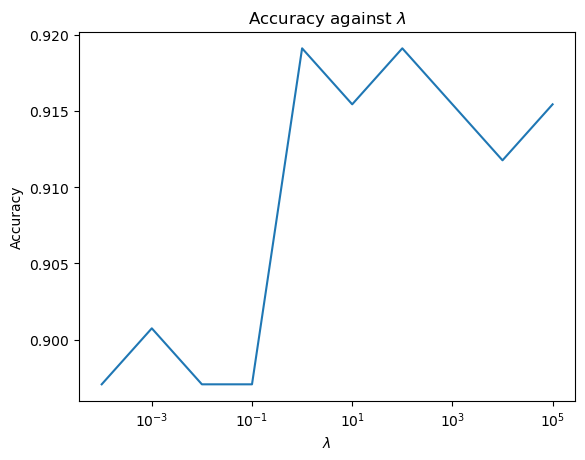

In [48]:
# choose the best accuracy under different lr
accuracy = np.max(scores, axis=1)
plt.semilogx(np.logspace(-4,5,10), accuracy)
plt.xlabel("$\lambda$")
plt.ylabel("Accuracy")
plt.title("Accuracy against $\lambda$")
plt.show()

### Report
By grid search, the optimal lambda `opt_lam` is 1.0, and the optimal learning rate `lr` is 1e-3, based on the lambda range `lamb_range` "np.logspace(-4,5,10)" and the learning rate range `lr_range` "np.logspace(-7,-2,6)".

In the loss function given, $\lambda$ is the term to control the penalization of the vialation of the hyperplane.
For a smaller value of $\lambda$, the penalization is softer and the margin is softer either. For $\lambda$ tending to infinity, the penalization becomes stronger, which means less misclassification is allowed.

#### Limitations of 2 versions of SVM:

- Although the hard-margin SVM serves to perfectly separating the classes, which is expected, in pratice, this is rarely encountered. Sticking to no misclassification makes it catch the distribution of labels "too well", including the noise of the data. This will produce high sensitivity to outliers and noise, and leads to a poor performance of the model.
- The soft-margin SVM, on the other hand, allows some overlapping of different labels in the same class. However, as it penalizes the violation softly, it's likely that the hyperplane cannot capture the features of the distribution clearly and doesn't separate the data points appropriately.

So for the explanation for the graph above, we observe that:
- when $\lambda$ is extremely small, the penalization for violating the plane is small, so the hyperplane cannot catch the features of the data well, and the accuracy is low.
- as $\lambda$ gets larger, the hyperplane fits better to the characteristics of the classes as a result of gretaer penalizing term value, so the accuracy is increasing.
- when $\lambda$ is too large, as previously explained, the hyperplane separates the data so well that it's extremly sensitive to noise and outliers. So the accuracy is going down.
- fluctuations due to randomness of shuffling and spliting the data.


The reason why including learning rate into the grid search is left to section 2.2.2

-------------------------------------------------------------------------------

2.2.2

Two heatmaps were plotted in this section, one for the angle between hyperplanes against lambdas with varied learning rate, one with default learning rate 1e-5. It's thought that the value of the angle is not only associated with $\lambda$, but also the value of learning rate. So the second heatmap was plotted to help explain the effect of the learning rate `lr`.

In [33]:
def plane_angle(v1, v2):
    """
    Return the angle between two hyperplanes.
    Args:
        v1, v2: vec representing a hyperplane.
    """
    v1_u = v1/np.linalg.norm(v1)
    v2_u = v2/np.linalg.norm(v2)
    
    # it can be shown that the dot product of 2 unit vecs is between -1 and 1, so use np.clip to make sure of it 
    return np.clip(np.dot(v1_u, v2_u), -1.0, 1.0)

In [36]:
def angle_list(l1,l2):
    """
    Return the angle between two hyperplanes for a list.
    Arg:
        l1, l2: a list of hyperplanes, each of which is represented by a vec.
    """
    l = np.zeros((len(l1),len(l2)))
    for i,x in enumerate(l1):
        for j,y in enumerate(l2):
            l[i][j] = plane_angle(x, y)
    return l 

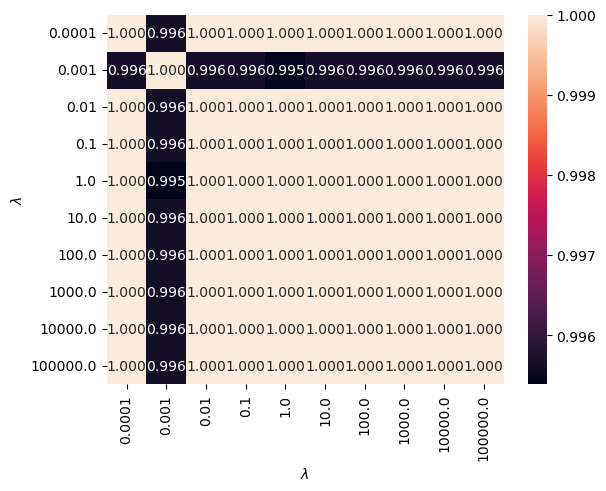

In [49]:
# heatmap using the hyperplane from grid search

# extract the weights corresponding the maximum accuracy for each lambda
indices = np.argmax(scores,axis=1)
w_list_1 = []
for i, w in enumerate(weights):
    w_list_1.append(w[indices[i]])

angles = angle_list(w_list_1,w_list_1)
x_axis_labels = np.logspace(-4,5,10)
h_1 = sns.heatmap(angles, annot=True, fmt=".3f", xticklabels=x_axis_labels, yticklabels=x_axis_labels)
h_1.set(xlabel='$\lambda$', ylabel='$\lambda$')
plt.show()

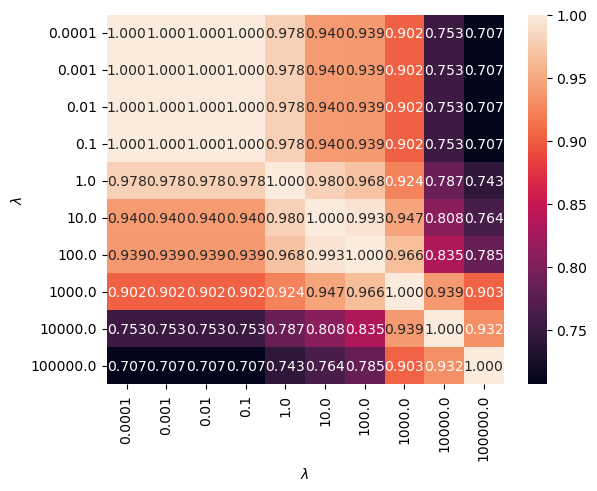

In [50]:
# heatmap with default learning rate 1e-5

w_list_2 = []

for lam in np.logspace(-4,5,10):
    w, c = sgd(X_train, y_train, regul_strength=lam, print_outcome=False)
    w_list_2.append(w)

angles = angle_list(w_list_2,w_list_2)
x_axis_labels = np.logspace(-4,5,10)
h_2 = sns.heatmap(angles,  annot=True, fmt=".3f", xticklabels=x_axis_labels, yticklabels=x_axis_labels)
h_2.set(xlabel='$\lambda$', ylabel='$\lambda$')
plt.show()

### Explanation:
For the first heatmap, which was plotted with each pair of hyperplanes with tuned $\lambda$ and learning rate `lr`, we see that the majority of cosine values is one, with a small proportion of values (when $\lambda=0.001$) close to 1. Note that the hyperplane to separate the data is not unique. This indicates that angles between the planes(counting in small variations of value around 1) are 0 and that we have found the optimal hyperplanes. If time permits, a larger range of `lr` (wrt a large range of $\lambda$) could be passed into the function, and a convergence to 0 for all chosen values is expected in this case.

For the second heatmap, which was plotted on the same range of $\lambda$ but a fixed value of `lr` 1e-5, we see that the cosine value between the hyperplanes varied according to the value of $\lambda$. At a constant learning rate, the value of the cosine of angles decreases as the difference between lambdas grows drastically, which was shown in the bottom horizontal line and the right vertical line. With the same learning rate `lr` 1e-05, it is reasonable that the hyperplane with $\lambda=0.0001$ will converge to the hyperplane with $\lambda=100000$. This explains the reason why tuning `lr` when tuning $\lambda$.

-------------------------------------------------------------------------------

2.2.3

In [39]:
# define a function to compute the quality measures (similar to in 2.1 for RF)
def svm_quality(y_pred, y_true):
    """
    Return the quality measures of the svm model.
    Args:
        y_pred: predicted values of the data
        y_true: the true values of the data
    """
    
    # convert to np.ndarray if necessary
    if type(y_pred) !=np.ndarray:
        y_pred = y_pred.to_numpy()

    if type(y_true) !=np.ndarray:
        y_true = y_true.to_numpy()

    # convert to Boolean array for computation conveniences
    y_pred = y_pred > 0
    y_true = y_true > 0

    # true positives
    tp = np.sum(y_pred & y_true)
    # true negatives
    tn = np.sum((~y_true) & (~y_pred))
    # false positives
    fp = np.sum((~y_true) & y_pred)
    # false negatives
    fn = np.sum(y_true & (~y_pred))
    
    # quality measures
    recall = tp / (tp+fn)
    specificity = tn / (tn+fp)
    accuracy = (tn+tp) / len(y_true)
    precision = tp / (tp+fp)
    fscore = 2*(precision*recall) /(precision+recall)
    confusion_matrix = np.array([[tp, fp], [fn, tn]])

    return (recall, specificity, accuracy, precision, fscore, confusion_matrix)

In [51]:
# retrainon the whole training data at optimal values of hyperparameters
# setting hyperparameters
learning_rate = opt_lr
regul_strength = opt_lam
max_iterations = 10000
stop_criterion = 1e-4
batch_size = 32

# retraining
w, c = sgd(X_train, y_train, max_iterations=max_iterations, stop_criterion=stop_criterion, batch_size=batch_size, learning_rate=learning_rate, regul_strength=regul_strength, print_outcome=True)
print("Retraining is finished")

Iteration: 500, Cost: 37608.80260445058
Retraining is finished


In [52]:
# predict and evaluate
y_pred_train = np.sign(X_train @ w)
y_pred_test = np.sign(X_test @ w)
train_svm_quality = svm_quality(y_train, y_pred_train)
test_svm_quality = svm_quality(y_test,y_pred_test)

# measures of quality: training set
print("For the training set:")
print('Training recall:', train_svm_quality[0])
print('Training specificity:', train_svm_quality[1])
print('Training accuracy:', train_svm_quality[2])
print('Training precision:', train_svm_quality[3])
print('Training F-score:', train_svm_quality[4]) 
print('Confusion Matrix: \n ', train_svm_quality[5])

# measures of quality: test set
print("For test set:")
print('Test recall:', test_svm_quality[0])
print('Test specificity:', test_svm_quality[1])
print('Test accuracy:', test_svm_quality[2])
print('Test precision:', test_svm_quality[3])
print('Test F-score:', test_svm_quality[4]) 
print('Confusion Matrix: \n ', test_svm_quality[5])

For the training set:
Training recall: 0.8666666666666667
Training specificity: 0.9259259259259259
Training accuracy: 0.9194139194139194
Training precision: 0.5909090909090909
Training F-score: 0.7027027027027029
Confusion Matrix: 
  [[ 26  18]
 [  4 225]]
For test set:
Test recall: 0.8181818181818182
Test specificity: 0.9339622641509434
Test accuracy: 0.9230769230769231
Test precision: 0.5625
Test F-score: 0.6666666666666666
Confusion Matrix: 
  [[ 9  7]
 [ 2 99]]


### Explanation:
In short, the model has a high recall, specifictity and accuracy for both the training and test data. The F-score for both sets are around 0.7 and the precision for both sets are low. 

Specifically,

From the confusion matrix, we can see that the data set is imbalanced with more 0s (`non-diabetes`) than 1s(`diabetes`). Therefore, the high accuracy doesn't necessarily entail full and correct information about the model performance, for the reason that the model could perform well only on the majority class (`non-diabetes`). In this case, it's suggested that quality measures which are free from TN, such as precision, F-score and recall.

- Recall and Specificity

The recall is high for both the training set and the test set, meaning that a patient with `diabetes` is highly likely to be diagonised with `diabetes`. Also, the specificity is also high for both sets, meaning that a patient with `non-diabetes` can be correctly diagonized as well. This is expected in detection of diseases. Therefore, the model performs well in this way.

- Precision

However, the precision is low, meaning that a patient with `non-diabets` is diagonized with `diabetes` at a possibility of around 0.5. This is not expected, as this will lead to a waste of treatment resources.

- F-score

The F-score is designed to reward similar recall and precision. As we have a high recall but a low precision, the F-socre is not so high neither.

To summarize, in this field of application, we expect a high true positive rate and a high true negative rate, which corresponds to the case that any patient can be diagonized correctly with his/her true physical conditions. In this case, a high recall and a high specificity meet our expectation. In terms of fitting the data set, the accuracy for the test set is slightly higher than the training data, which is adverse to what we expect, as the model should be fitting better on the training dataset.

-------------------------------------------------------------------------------

2.2.4

### Preliminaries: Data Processing

In [53]:
# load data as pandas data frames
dia_train = pd.read_csv('diabetes_samples.csv',decimal=",")
dia_test = pd.read_csv('diabetes_test.csv',decimal=",")

# take a look of the datasets
print("Shape of train dataset", dia_train.shape)
print("Shape of test dataset", dia_test.shape)

# check for any duplicated rows
print("Any duplicated rows in train dataset:",dia_train.duplicated().any())
print("Any duplicated rows in test dataset:",dia_test.duplicated().any())

# Note: convert the target to numbericla values +1 and -1 as set on lecture notes
diabetes_map = {'Diabetes': 1.0, 'No diabetes': -1.0}
dia_train['diabetes'] = dia_train['diabetes'].map(diabetes_map)
dia_test['diabetes'] = dia_test['diabetes'].map(diabetes_map)

# drop the columns as did in 2.1.1, as they either provide useless info or repeated batches of info
diabetes_train= dia_train.drop(['patient_number','waist','hip','cholesterol','hdl_chol'], axis=1)
diabetes_test= dia_test.drop(['patient_number','waist','hip','cholesterol','hdl_chol'], axis=1)

print("Display the cleaned training data:")
display(dia_train.head(5))

# split the featuresa nd the target
X_train, y_train = diabetes_train.iloc[:, :-1], diabetes_train.loc[:, 'diabetes']
X_test, y_test = diabetes_test.iloc[:, :-1], diabetes_test.loc[:, 'diabetes']

# convert to np array
X_train, y_train = X_train.to_numpy(), y_train.to_numpy()
X_test, y_test = X_test.to_numpy(), y_test.to_numpy()

# standardize
train_mean, train_std = np.mean(X_train, 0), np.std(X_train, 0)
X_train = standardize(X_train)
X_test = (X_test - train_mean) / train_std

# insert 1 in every row for intercept b
X_train = np.hstack((X_train, np.ones((len(X_train),1)) ))
X_test = np.hstack((X_test, np.ones((len(X_test),1)) ))   

print("Shape of X_train, X_test: ", X_train.shape, X_test.shape)
print("Shape of y_train, y_test: ", y_train.shape, y_test.shape)

Shape of train dataset (273, 15)
Shape of test dataset (117, 15)
Any duplicated rows in train dataset: False
Any duplicated rows in test dataset: False
Display the cleaned training data:


patient_number  cholesterol  glucose  hdl_chol  chol_hdl_ratio  age  \
0             115          224       85        30             7.5   36   
1             318          194       95        36             5.4   63   
2              73          207       75        44             4.7   30   
3              69          144       81        28             5.1   30   
4             326          181      177        24             7.5   64   

   height  weight   bmi  systolic_bp  diastolic_bp  waist  hip  \
0      69     205  30.3          150            99     37   41   
1      58     210  43.9          140           100     44   53   
2      72     180  24.4          118            62     35   41   
3      72     165  22.4          118            78     31   38   
4      71     225  31.4          130            66     44   47   

   waist_hip_ratio  diabetes  
0             0.90      -1.0  
1             0.83      -1.0  
2             0.85      -1.0  
3             0.82      -1.0  
4             0.94       1.0

Shape of X_train, X_test:  (273, 10) (117, 10)
Shape of y_train, y_test:  (273,) (117,)


In [54]:
def kernel_matrix(X1, X2, sigma):
    """
    Return the kernel matrix K
    Args:
        X1, X2: data input
        sigma: coefficient in the kernel.
    """
    K = sigma * X1 @ X2.T + 1
    return np.tanh(K,K)

In [55]:
# partial code from coding book
def compute_cost_kernel(u, K, y, lam=1e3, b=0):
    """
    Return the value of the loss function.
    Args:
        u: input data
        y: output data
        K: kernel matrix
        lam: lambda in the loss function
        b: term b in the loss function
    """

    # define the hinge loss cost with the kernel trick.
    distances = 1 - (y)*(K @ u + b)
    distances[distances < 0] = 0
    hinge = lam * distances.mean()

    # calculate cost
    return 0.5 * np.dot(u,K@u) + hinge

In [62]:
def calculate_cost_gradient_kernel(u, K_batch, y_batch, lam=1e3, b=0):
    """
    Return the gradient of the loss function.
    Args:
        u: the input coefficients
        K_batch: batches of K corresponding to the batch of X
        y_batch: batches of y corresponding to the batch of X
        lam: lambda in the loss
        b: intercept term b in the loss
    """
    
    # if only one example is passed
    if type(y_batch) == np.float64 or type(y_batch) == np.int32:
        y_batch = np.asarray([y_batch])
        K_batch = np.asarray([K_batch])
    
    # compute gradient of first and second term
    d = 1 - (y_batch * (K_batch@ u + b))
    dterm_1 = K_batch @ u
    dterm_2 = -(K_batch * y_batch[:, np.newaxis]) * lam *(d > 0)[:, np.newaxis]
    
    # combine to get gradient for u and intercept
    d_u = np.sum(dterm_1[:, np.newaxis] + dterm_2, axis=0)
    d_b = -lam * np.sum(y_batch[d>0])  
    
    return d_u/len(y_batch), d_b/len(y_batch)

In [80]:
def sgd_kernel(K, y, batch_size, max_iterations=10000, stop_criterion=0.0001, learning_rate=1e-4, lam=1e3, print_outcome=False):
    """
    Return the estimated coefficients and the intercept estimate.
    Args:
        K: the kernel matrix
        batch_size: the size of the subset of the data extracted
        lam: lambda in the loss function
    """

    # initialisation
    u = np.zeros(K.shape[1])
    b = 0
    nth = 0
    prev_cost = np.inf
    indices = np.arange(len(y))

    for iteration in range(1, max_iterations):
        # shuffle to prevent repeating update cycles
        np.random.shuffle(indices)
        K, y = K[indices], y[indices]

        # update with batch size
        for start in range(0, len(indices), batch_size):
            end = start + batch_size
            # K_batch, y_batch = K[start:end], y[start:end]

            K_batch, y_batch = K[start:end], y[start:end]
            grad = calculate_cost_gradient_kernel(u, K_batch , y_batch, lam, b)
            u -= (learning_rate * grad[0])
            b -= (learning_rate * grad[1])

        if iteration==2**nth or iteration==max_iterations-1:
            # compute cost
            cost = compute_cost_kernel(u, K, y, lam, b)
            if print_outcome:
                print(f"Iteration: {iteration}, Cost: {cost}")

            # stopping criterion
            if abs(prev_cost - cost) < stop_criterion * prev_cost:
                return u, b

            prev_cost = cost
            nth += 1
    
    return u, b

In [82]:
lam = 10
batch_size = 8
b_list = []
u_list = []
#accu_difference = []

def accu(u, X, y, sigma, b=0):
        """
        Return the accuracy of the predicted value.
        """
        K_test = kernel_matrix(X, X_train, sigma)
        y_preds = np.sign(K_test@u + b)
        return np.mean(y_preds == y)

for sigma in [0.01, 0.1, 1, 2]:
    print(f'For sigma: {sigma}')
    K_train = kernel_matrix(X_train, X_train, sigma)

    u, b = sgd_kernel(K_train, y_train, batch_size, max_iterations=10000, stop_criterion=0.001, learning_rate=1e-5, lam=lam, print_outcome=False)
    u_list.append(u)
    b_list.append(b)

    print(f"Intercept: {b}")
    train_score = accu(u, X_train, y_train, sigma, b)
    test_score = accu(u, X_test, y_test, sigma, b)
    print(f"Accuracy on training set:{train_score}")
    print(f"Accuracy on test set: {test_score}")
    #accu_difference.append(test_score-train_score)

For sigma: 0.01
Intercept: -0.0341875000000002
Accuracy on training set:0.8388278388278388
Accuracy on test set: 0.8632478632478633
For sigma: 0.1
Intercept: -1.1067625000001418
Accuracy on training set:0.9304029304029304
Accuracy on test set: 0.9316239316239316
For sigma: 1
Intercept: -3.492287499995064
Accuracy on training set:0.9267399267399268
Accuracy on test set: 0.7777777777777778
For sigma: 2
Intercept: -2.9689249999961045
Accuracy on training set:0.9706959706959707
Accuracy on test set: 0.811965811965812


### Explanation:
The given sigmoid function is a tanh function, whose shape has the similar increasing trend to the link function introduced in logistic regression. Such a function can be used to deal with classification tasks, especially for non-linear data. $\sigma$ here poses an impact on the slope of the sigmiod function. When $\sigma$ increases, the sigmoid function turns steeper and increases faster. This, in SVM, means a big change in the response is produced corresponding to a small change in the input data.

For the figures produced in the chunk above, as sigma increases, it's observed that the accuracy for the training data increases. This is when the sigmoid function turns steeper, its discrimination power increases as well and draws a clearer boundary between classes of data.

However, when the sigmoid discriminates the data too well, as $\sigma$ increases to large values, it gradually loses its generalization to fit unseen data. So it can be seen that the accuracy for the test data increases first and then decreases when $\sigma=1$ and $\sigma=2$.

Also, note that the test accuracy is higher than the training accuracy for both $\sigma=0.01$ and $\sigma=0.1$. This is because for such small sigmas, the sigmoid function increases very slowly, which means that it takes a large change in the input data to get a small response of the output data. Therefore, the training data is not efficiently trained and the trained model underfits the data.

To summarize, for the above 4 cases of values of $\sigma$, the accuracy is increasing for 0.01 and 0.1, and decreases at 1 and 2. It's expected the optimal intercept falls between 0.1 and 1. If time permits, will do scanning on the intercept.

-------------------------------------------------------------------------------

2.2.5

For each of the $\sigma$ value, print its measures on the test dataset.

For comparison, just put all statistics in a table and make some comparisons.

In [83]:
for i,sigma in enumerate([0.01, 0.1, 1, 2]):
    print(f'For sigma {sigma}')
    K_test = kernel_matrix(X_test, X_train, sigma)
    y_pred = np.sign(K_test@u_list[i] + b_list[i])

    test_ksvm_quality = svm_quality(y_pred, y_test)
    print(f'Test recall: {test_ksvm_quality[0]:.5f}')
    print(f'Test specificity: {test_ksvm_quality[1]:.5f}')
    print(f'Test accuracy: {test_ksvm_quality[2]:.5f}')
    print(f'Test precision: {test_ksvm_quality[3]:.5f}')
    print(f'Test F-score: {test_ksvm_quality[4]:.5f}') 
    print('Confusion Matrix:', test_ksvm_quality[5])

For sigma 0.01
Test recall: 0.00000
Test specificity: 1.00000
Test accuracy: 0.86325
Test precision: nan
Test F-score: nan
Confusion Matrix: [[  0   0]
 [ 16 101]]
For sigma 0.1
Test recall: 0.62500
Test specificity: 0.98020
Test accuracy: 0.93162
Test precision: 0.83333
Test F-score: 0.71429
Confusion Matrix: [[10  2]
 [ 6 99]]
For sigma 1
Test recall: 0.56250
Test specificity: 0.81188
Test accuracy: 0.77778
Test precision: 0.32143
Test F-score: 0.40909
Confusion Matrix: [[ 9 19]
 [ 7 82]]
For sigma 2
Test recall: 0.62500
Test specificity: 0.84158
Test accuracy: 0.81197
Test precision: 0.38462
Test F-score: 0.47619
Confusion Matrix: [[10 16]
 [ 6 85]]


C:\Users\Luyuan Wang\AppData\Local\Temp\ipykernel_9572\3291629287.py:30: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp+fp)


measures on the test data for linear SVM and kernelized SVM on different $\sigma$

|| Linear SVM |  Kernelised SVM, $\sigma=0.01$| Kernelised SVM, $\sigma=0.1$|   Kernelised SVM, $\sigma=1$|     Kernelised SVM, $\sigma=2$
|----------|----------|----------|----------|----------|----------|
| Recall |  0.8182 |0.0|0.62500|0.56250|0.62500
| Specificity | 0.93396 |1.00000|0.98020|0.81188|0.84158
| Accuracy | 0.92308 |0.86325|0.93162|0.77778|0.81197
| Precision | 0.56250 |nan|83333|0.32143|0.38462
| F score | 0.66667 |nan|0.71429|0.40909|0.47619

### Explanation:

- distribution of the data:

The kernelized SVM at $\sigma=1$ performs better than the linear SVM. This indicates that the data is not linearly-separable. Thus, a kernelized SVM is preferred.

- Comparison with linear SVM:

Note that for $\sigma=0.01$, TP==FN==0. This could be the reason that for such a slowly increasing signoid function, all true positives are 'close' to each other and are clustered around the threshold, but within the region classified as negatives and all true negatives fall within the region classified as negatives. In this case, the model loses its power to capture the feature of positives.

For $\sigma=0.1$, the specificity, accuracy and the precision and the F-score are all higher, which is ideal is this problem. The recall is smaller, meaning that a patient with `diabetes` could be diagonised with `non-diabetes` at a rate of about 0.4, which should be improved.

For $\sigma=1$ and $\sigma=2$, all measures perform less better than linear SVM. This could be due to the situation that the signoid is highly sentitive to noise and outliers so it performs well on the training data but loses its generalization to the test data. Thus, it performs not well on the test data.

- To further optimize the model:

In this problem, we expect all patients with `diabetes` and with `non-diabetes` to be correctly diagonalized. Therefore, we want a high recall and a high precision on the test data. So far, for searched four values of $\sigma$, none of them behaves as expected. If time permits, I will search for more values of $\sigma$ and find an optimal one. In addition, it can be seen that the test data is also unbalanced, as we have a high accuracy and a low recall for all models. Therefore, apart from optimal $\sigma$, resampling with adjusted weights is necesarry given more time to train the model.  

### Thanks for reading!